# Bootstrap Sampling for all my non-parametric KS and Spearman's rank correlation tests with contamination < 1%

In [1]:
import numpy as np
import sframe as sf
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline


[INFO] Start server at: ipc:///tmp/graphlab_server-16673-1464015842 - Server binary: /Users/Mehdi/anaconda/lib/python2.7/site-packages/sframe/unity_server - Server log: /tmp/sframe_server_1464015842.log
[INFO] GraphLab Server Version: 1.8


In [2]:
# This function accepts  a Numpy arrays with N elements, and make a 1D array of M*N elements with random order. 
def randomize(x,M):
    Xdeck=np.repeat(x,M,axis=0)
    np.random.shuffle(Xdeck)
    np.random.shuffle(Xdeck)
    return Xdeck

In [3]:
All=sf.SFrame.read_csv('/Users/Mehdi/Dropbox/SPASS/main/SPASS-NVSS-final_withContamination.csv',skiprows=57)#,  tag,ra, dec, gl, gb, fct, ferr, nvp1, nvp1er, nvfp, nvfper, nvlim, thnv2, thnv2er, mj, lmj, mn, lmn, fspfit, efspi, fsp_p3s, efsp_p3s, spfp,spfper, splim, thsp2, thsp2er, al, aler, depol, der, rmt2, rmt2er, rm2 ,rm2er , drm2 , drm2er,format=fmt
All.print_rows(10,56)

PROGRESS: Finished parsing file /Users/Mehdi/Dropbox/SPASS/main/SPASS-NVSS-final_withContamination.csv
PROGRESS: Parsing completed. Parsed 100 lines in 0.026138 secs.
------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[str,float,float,float,float,float,float,float,float,float,float,int,float,float,float,int,float,int,float,float,float,float,float,float,int,float,float,float,float,float,float,float,float,float,float,float,float,float,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
PROGRESS: Finished parsing file /Users/Mehdi/Dropbox/SPASS/main/SPASS-NVSS-final_withContamination.csv
PROGRESS: Parsing completed. Parsed 533 lines in 0.012661 secs.
+----------------+---------

In [4]:
#All2=sf.SFrame.read_csv('/Users/Mehdi/Dropbox/SPASS/Paper_shared_Larry/ToSubmit/SPASS-NVSS.csv',header=False)#,  tag,ra, dec, gl, gb, fct, ferr, nvp1, nvp1er, nvfp, nvfper, nvlim, thnv2, thnv2er, mj, lmj, mn, lmn, fspfit, efspi, fsp_p3s, efsp_p3s, spfp,spfper, splim, thsp2, thsp2er, al, aler, depol, der, rmt2, rmt2er, rm2 ,rm2er , drm2 , drm2er,format=fmt


In [73]:
#cat=sf.SFrame.read_csv('/Users/Mehdi/Dropbox/SPASS/main/SPASS-NVSS-python.csv',skiprows=38)#,  tag,ra, dec, gl, gb, fct, ferr, nvp1, nvp1er, nvfp, nvfper, nvlim, thnv2, thnv2er, mj, lmj, mn, lmn, fspfit, efspi, fsp_p3s, efsp_p3s, spfp,spfper, splim, thsp2, thsp2er, al, aler, depol, der, rmt2, rmt2er, rm2 ,rm2er , drm2 , drm2er,format=fmt


# KS simulation starting from the original 533 sample

# Simulation for |log(D)| and |Delta(RM)|


In [7]:
idgd=All[(All['Pi_SP_lim']==1) & (All['Pi_NV_lim']==1) & (All['DeltaRM'] != -1000) & (All['P_NV_ct_frac'] <=0.01) & (All['I_NV']/All['I_NV_target'] <=1.01)]

In [8]:
print len(idgd['Tag'])

153


In [9]:
num=100000
D_idgd=idgd['Depol'].to_numpy()
logD=np.absolute(np.log10(D_idgd))
drm=idgd['DeltaRM'].to_numpy()
absdrm=np.absolute(drm)
logD_random=randomize(logD,num)
print np.shape(logD_random)
absdrm_random=randomize(absdrm,num)


(15300000,)


In [10]:
meddrm=np.median(absdrm)
half1=logD[np.where(absdrm< meddrm)]
half2=logD[np.where(absdrm>= meddrm)]
ks_main3=stats.mstats.ks_twosamp(half1,half2)
print ks_main3
rho3, spvalue3 =stats.spearmanr(absdrm,logD)
print 'Spearman rank correlation ', rho3
print 'Spearman p-value', spvalue3

(0.24453178400546749, 0.020629427564164013)
Spearman rank correlation  0.246215012315
Spearman p-value 0.00215563452574


In [11]:
ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(drm)
    drmi=absdrm_random[j:j+len(drm)]
    logD1=logD_random[j:j+len(drm)]
    meddrmi=np.median(drmi)
    half1=logD1[np.where(drmi < meddrmi )]
    half2=logD1[np.where(drmi >= meddrmi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(drmi,logD1)
    rho[i] =res2[0]
    sp_value[i]=res2[1]

print 'Done!'

Done!


In [12]:
howmany3=np.where(ks1 >=ks_main3[0])
frac3=len(howmany3[0])/float(num)
print 'The simulated p-vale for the KS statistic in |logD| based on |DeltaRM| ', frac3 
print len(howmany3[0])

howmany33=np.where(np.absolute(rho) >=rho3)
frac33=len(howmany33[0])/float(num)
print 'The simulated p-vale for the Spearman rho in |logD| for the simulation is', frac33 
print len(howmany33[0])


The simulated p-vale for the KS statistic in |logD| based on |DeltaRM|  0.01288
1288
The simulated p-vale for the Spearman rho in |logD| for the simulation is 0.00211
211


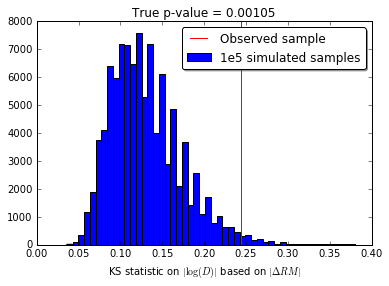

In [13]:
fig4=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = 0.00105')
plt.xlabel(r'KS statistic on $|\log(D)|$ based on $|\Delta RM|$')
plt.plot([ks_main3[0],ks_main3[0]],[0,8000],color='red',label='Observed sample')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_logD.png')

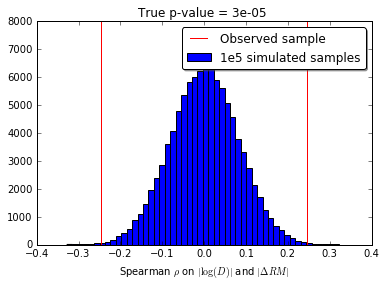

In [14]:
fig5=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = 3e-05 ')
plt.xlabel(r'Spearman $\rho$ on $|\log(D)|$ and $|\Delta RM|$')
plt.plot([rho3,rho3],[0,8000],color='red',label='Observed sample')
plt.plot([-1*rho3,-1*rho3],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_logD_DeltaRM.png')

# D & |Delta RM| for D>1 and KS distributions based on med(|Delta RM|)

In [15]:
num=100000
sample=All[(All['Pi_SP_lim']==1) & (All['Pi_NV_lim']==1) & (All['DeltaRM'] != -1000) & (All['Depol'] > 1)& (All['P_NV_ct_frac'] <=0.01) & (All['I_NV']/All['I_NV_target'] <=1.01)]
D_idgd=sample['Depol'].to_numpy()
drm=sample['DeltaRM'].to_numpy()
absdrm=np.absolute(drm)
logD2=np.log10(D_idgd)

logD2_random=randomize(logD2,num)
print np.shape(logD2_random)
absdrm_random=randomize(absdrm,num)

meddrm=np.median(absdrm)
half1=logD2[np.where(absdrm< meddrm)]
half2=logD2[np.where(absdrm>= meddrm)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(absdrm,logD2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(drm)
    drmi=absdrm_random[j:j+len(drm)]
    logD1=logD2_random[j:j+len(drm)]
    meddrmi=np.median(drmi)
    half1=logD1[np.where(drmi < meddrmi )]
    half2=logD1[np.where(drmi >= meddrmi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(drmi,logD1)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in logD based on |DeltaRM| ', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in logD for the simulation is', frac2 
print len(howmany2[0])

(10000000,)
KS test  (0.32000000000000001, 0.011952043239196616)
Spearman rank correlation  0.309436218881
Spearman p-value 0.00173192961252
Done!
The simulated p-vale for the KS statistic in logD based on |DeltaRM|  0.00778
778
The simulated p-vale for the Spearman rho in logD for the simulation is 0.00205
205


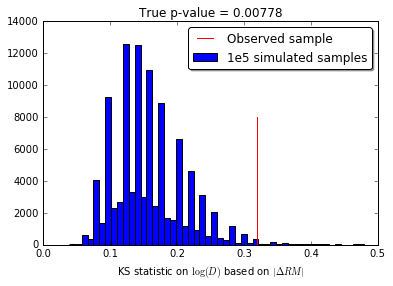

In [16]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $\log(D)$ based on $|\Delta RM|$')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label='Observed sample')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_logD2.png')

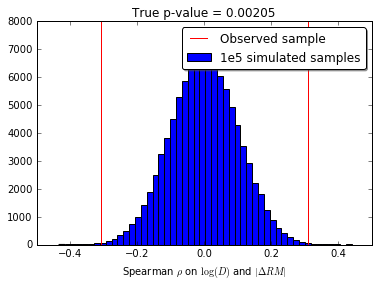

In [17]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $\log(D)$ and $|\Delta RM|$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label='Observed sample')
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_logD2_DeltaRM.png')

# D & |Delta RM| for D < 1 and KS distributions based on med(|Delta RM|)

In [20]:
num=100000
sample=All[(All['Pi_SP_lim']==1) & (All['Pi_NV_lim']==1) & (All['DeltaRM'] != -1000) & (All['Depol'] < 1)& (All['P_NV_ct_frac'] <=0.01) & (All['I_NV']/All['I_NV_target'] <=1.01) ]
D_idgd=sample['Depol'].to_numpy()
drm=sample['DeltaRM'].to_numpy()
absdrm=np.absolute(drm)
logD2=np.log10(D_idgd)

logD2_random=randomize(logD2,num)
print np.shape(logD2_random)
absdrm_random=randomize(absdrm,num)

meddrm=np.median(absdrm)
half1=logD2[np.where(absdrm< meddrm)]
half2=logD2[np.where(absdrm>= meddrm)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(absdrm,logD2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(drm)
    drmi=absdrm_random[j:j+len(drm)]
    logD1=logD2_random[j:j+len(drm)]
    meddrmi=np.median(drmi)
    half1=logD1[np.where(drmi < meddrmi )]
    half2=logD1[np.where(drmi >= meddrmi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(drmi,logD1)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in logD based on |DeltaRM| ', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in logD for the simulation is', frac2 
print len(howmany2[0])

(5300000,)
KS test  (0.2165242165242165, 0.56375190566555256)
Spearman rank correlation  -0.0754089158485
Spearman p-value 0.591502751799
Done!
The simulated p-vale for the KS statistic in logD based on |DeltaRM|  0.3948
39480
The simulated p-vale for the Spearman rho in logD for the simulation is 0.59076
59076


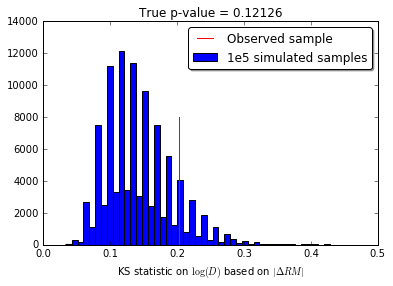

In [88]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $\log(D)$ based on $|\Delta RM|$')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label='Observed sample')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_logD2_Dlt1.png')

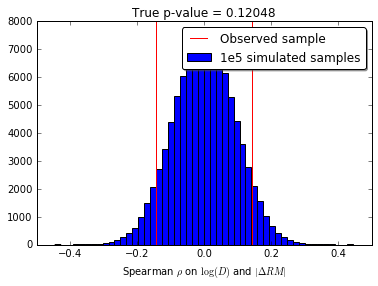

In [89]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $\log(D)$ and $|\Delta RM|$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label='Observed sample')
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_logD2_DeltaRM_Dlt1.png')

# |log(D)| & $\Pi_{SP}$ and KS distributions based on med(|$\pi_{SP}$|)

In [21]:
num=100000
sample=All[(All['Pi_SP_lim']==1) & (All['Pi_NV_lim']==1)& (All['P_NV_ct_frac'] <=0.01) & (All['I_NV']/All['I_NV_target'] <=1.01)]
D=sample['Depol'].to_numpy()
pi_sp=sample['Pi_SP'].to_numpy()
logD2=np.absolute(np.log10(D))

logD2_random=randomize(logD2,num)
print np.shape(logD2_random)
pi_random=randomize(pi_sp,num)

med=np.median(pi_sp)
half1=logD2[np.where(pi_sp< med)]
half2=logD2[np.where(pi_sp>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(pi_sp,logD2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(pi_sp)
    pii=pi_random[j:j+len(pi_sp)]
    logD1=logD2_random[j:j+len(pi_sp)]
    medi=np.median(pii)
    half1=logD1[np.where(pii < medi )]
    half2=logD1[np.where(pii >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(pii,logD1)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in |logD| based on Pi_SP ', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in |logD| for the simulation is', frac2 
print len(howmany2[0])

(16900000,)
KS test  (0.29047619047619067, 0.0016021473723816569)
Spearman rank correlation  -0.265411831774
Spearman p-value 0.000487545765487
Done!
The simulated p-vale for the KS statistic in |logD| based on Pi_SP  0.00078
78
The simulated p-vale for the Spearman rho in |logD| for the simulation is 0.00058
58


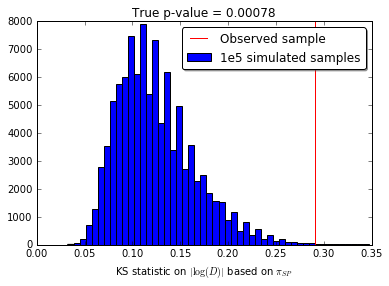

In [22]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $|\log(D)|$ based on $\pi_{SP}$')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label='Observed sample')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_abslogD_pi.png')

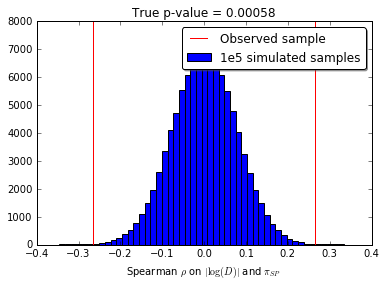

In [23]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $|\log(D)|$ and $\pi_{SP}$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label='Observed sample')
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_abslogD_PiSP.png')

# |log(D)| & $\Pi_{SP}$ for $\alpha < -0.5$ and KS distributions based on med(|$\pi_{SP}$|)


In [24]:
num=100000
sample=All[(All['Pi_SP_lim']==1) & (All['Pi_NV_lim']==1) & (All['Alpha'] < -0.5)& (All['P_NV_ct_frac'] <=0.01) & (All['I_NV']/All['I_NV_target'] <=1.01)]
D=sample['Depol'].to_numpy()
pi_sp=sample['Pi_SP'].to_numpy()
logD2=np.absolute(np.log10(D))

logD2_random=randomize(logD2,num)
print np.shape(logD2_random)
pi_random=randomize(pi_sp,num)

med=np.median(pi_sp)
half1=logD2[np.where(pi_sp< med)]
half2=logD2[np.where(pi_sp>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(pi_sp,logD2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(pi_sp)
    pii=pi_random[j:j+len(pi_sp)]
    logD1=logD2_random[j:j+len(pi_sp)]
    medi=np.median(pii)
    half1=logD1[np.where(pii < medi )]
    half2=logD1[np.where(pii >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(pii,logD1)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in |logD| based on Pi_SP ', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in |logD| for the simulation is', frac2 
print len(howmany2[0])

(13700000,)
KS test  (0.2559676044330777, 0.022489763835168205)
Spearman rank correlation  -0.221245299112
Spearman p-value 0.00937240078024
Done!
The simulated p-vale for the KS statistic in |logD| based on Pi_SP  0.01392
1392
The simulated p-vale for the Spearman rho in |logD| for the simulation is 0.00939
939


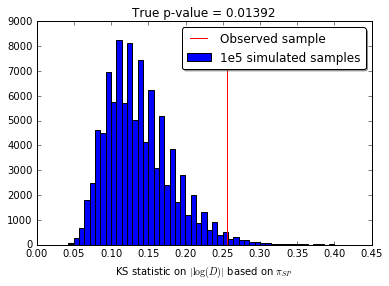

In [25]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $|\log(D)|$ based on $\pi_{SP}$')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label='Observed sample')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_abslogD_pi_steep.png')

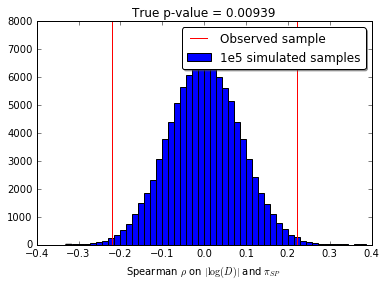

In [26]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $|\log(D)|$ and $\pi_{SP}$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label='Observed sample')
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_abslogD_PiSP_steep.png')

# |log(D)| & $\Pi_{SP}$ for $\alpha \ge -0.5$ and KS distributions based on med(|$\pi_{SP}$|)


In [98]:
num=100000
sample=All[(All['Pi_SP_lim']==1) & (All['Pi_NV_lim']==1) & (All['Alpha'] >= -0.5)]
D=sample['Depol'].to_numpy()
pi_sp=sample['Pi_SP'].to_numpy()
logD2=np.absolute(np.log10(D))

logD2_random=randomize(logD2,num)
print np.shape(logD2_random)
pi_random=randomize(pi_sp,num)

med=np.median(pi_sp)
half1=logD2[np.where(pi_sp< med)]
half2=logD2[np.where(pi_sp>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(pi_sp,logD2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(pi_sp)
    pii=pi_random[j:j+len(pi_sp)]
    logD1=logD2_random[j:j+len(pi_sp)]
    medi=np.median(pii)
    half1=logD1[np.where(pii < medi )]
    half2=logD1[np.where(pii >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(pii,logD1)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in |logD| based on Pi_SP ', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in |logD| for the simulation is', frac2 
print len(howmany2[0])

(10100000,)
KS test  (0.28431372549019612, 0.03375626226785898)
Spearman rank correlation  -0.368608057968
Spearman p-value 0.000148948936386
Done!
The simulated p-vale for the KS statistic in |logD| based on Pi_SP  0.02176
2176
The simulated p-vale for the Spearman rho in |logD| for the simulation is 0.00019
19


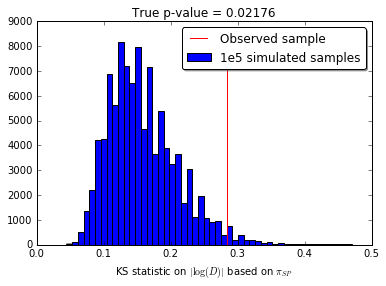

In [99]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $|\log(D)|$ based on $\pi_{SP}$')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label='Observed sample')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_abslogD_pi_flat.png')

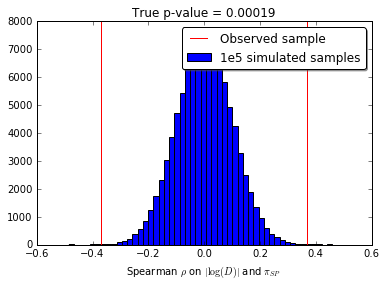

In [100]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $|\log(D)|$ and $\pi_{SP}$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label='Observed sample')
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_abslogD_PiSP_flat.png')

# D & $\Pi_{SP}$ for $D > 1$ and KS distributions based on med(|$\pi_{SP}$|)


In [42]:
num=100000
sample=All[(All['Pi_SP_lim']==1) & (All['Pi_NV_lim']==1) & (All['Depol'] > 1)& (All['P_NV_ct_frac'] <=0.01) & (All['I_NV']/All['I_NV_target'] <=1.01)]
D=sample['Depol'].to_numpy()
pi_sp=sample['Pi_SP'].to_numpy()
logD2=D

logD2_random=randomize(logD2,num)
print np.shape(logD2_random)
pi_random=randomize(pi_sp,num)

med=np.median(pi_sp)
half1=logD2[np.where(pi_sp< med)]
half2=logD2[np.where(pi_sp>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(pi_sp,logD2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(pi_sp)
    pii=pi_random[j:j+len(pi_sp)]
    logD1=logD2_random[j:j+len(pi_sp)]
    medi=np.median(pii)
    half1=logD1[np.where(pii < medi )]
    half2=logD1[np.where(pii >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(pii,logD1)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in D based on Pi_SP ', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in D for the simulation is', frac2 
print len(howmany2[0])

(11200000,)
KS test  (0.17857142857142852, 0.33377372641119879)
Spearman rank correlation  -0.212730694718
Spearman p-value 0.0243276480258
Done!
The simulated p-vale for the KS statistic in D based on Pi_SP  0.27549
27549
The simulated p-vale for the Spearman rho in D for the simulation is 0.02473
2473


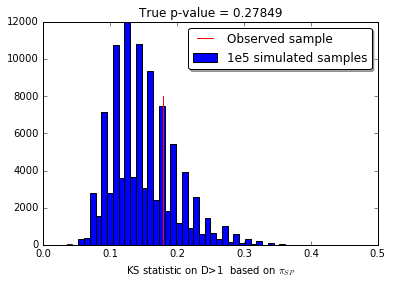

In [38]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on D>1  based on $\pi_{SP}$')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label='Observed sample')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_Dgt1_pi.png')

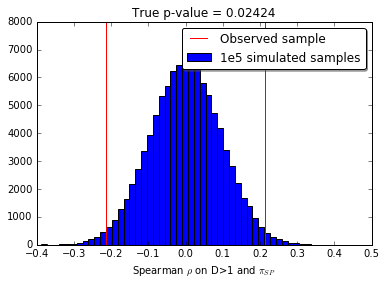

In [39]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on D>1 and $\pi_{SP}$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label='Observed sample')
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_Dgt1_PiSP.png')

# D & $|RM_T|$  and KS distributions based on med($|RM_T|$)


In [104]:
num=100000
sample=All[(All['Pi_SP_lim']==1) & (All['Pi_NV_lim']==1) & (All['RM_T'] != -1000)]
D=sample['Depol'].to_numpy()
rmt=sample['RM_T'].to_numpy()
rmt=np.absolute(rmt)
logD2=D

logD2_random=randomize(logD2,num)
print np.shape(logD2_random)
rmt_random=randomize(rmt,num)

med=np.median(rmt)
half1=logD2[np.where(rmt< med)]
half2=logD2[np.where(rmt>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(rmt,logD2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(rmt)
    pii=rmt_random[j:j+len(rmt)]
    logD1=logD2_random[j:j+len(rmt)]
    medi=np.median(pii)
    half1=logD1[np.where(pii < medi )]
    half2=logD1[np.where(pii >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(pii,logD1)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in D based on |RM_T| ', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in D for the simulation is', frac2 
print len(howmany2[0])

(35500000,)
KS test  (0.1729194439154445, 0.0099094926598557904)
Spearman rank correlation  0.179984829928
Spearman p-value 0.000656622448208
Done!
The simulated p-vale for the KS statistic in D based on |RM_T|  0.00636
636
The simulated p-vale for the Spearman rho in D for the simulation is 0.0007
70


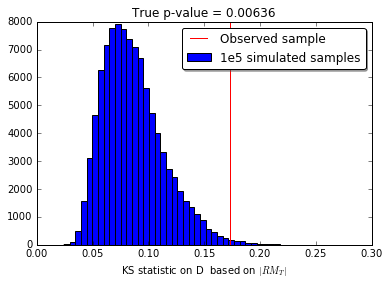

In [105]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on D  based on $|RM_T|$')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label='Observed sample')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_D_rmt.png')

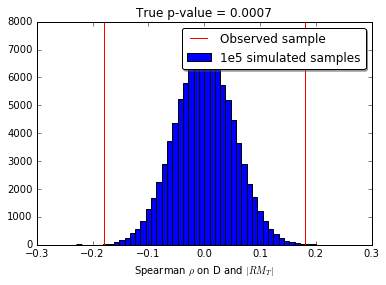

In [106]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on D and $|RM_T|$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label='Observed sample')
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_D_rmt.png')

# $|\log(D)|$ & $|RM_T|$  and KS distributions based on med($|RM_T|$)


In [107]:
num=100000
sample=All[(All['Pi_SP_lim']==1) & (All['Pi_NV_lim']==1) & (All['RM_T'] != -1000)]
D=sample['Depol'].to_numpy()
rmt=sample['RM_T'].to_numpy()
rmt=np.absolute(rmt)
logD2=np.absolute(np.log10(D))

logD2_random=randomize(logD2,num)
print np.shape(logD2_random)
rmt_random=randomize(rmt,num)

med=np.median(rmt)
half1=logD2[np.where(rmt< med)]
half2=logD2[np.where(rmt>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(rmt,logD2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(rmt)
    pii=rmt_random[j:j+len(rmt)]
    logD1=logD2_random[j:j+len(rmt)]
    medi=np.median(pii)
    half1=logD1[np.where(pii < medi )]
    half2=logD1[np.where(pii >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(pii,logD1)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in |log(D)| based on |RM_T| ', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in |log(D)| for the simulation is', frac2 
print len(howmany2[0])

(35500000,)
KS test  (0.17844220148543133, 0.0070220826161991592)
Spearman rank correlation  0.118513611801
Spearman p-value 0.0255511071345
Done!
The simulated p-vale for the KS statistic in |log(D)| based on |RM_T|  0.0048
480
The simulated p-vale for the Spearman rho in |log(D)| for the simulation is 0.02521
2521


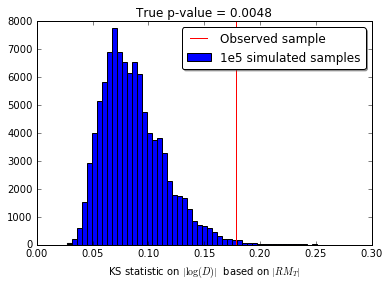

In [108]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $|\log(D)|$  based on $|RM_T|$')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label='Observed sample')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_abslogD_rmt.png')

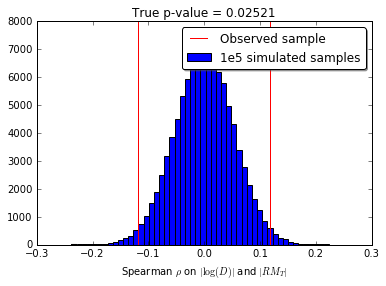

In [109]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $|\log(D)|$ and $|RM_T|$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label='Observed sample')
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_abslogD_rmt.png')

# $|\log(D)|$ & $|RRM_{NS}|$  and KS distributions based on med($|RRM_{NS}|$)


In [110]:
num=100000
sample=All[(All['Pi_SP_lim']==1) & (All['Pi_NV_lim']==1) & (All['RM_NS'] != -1000) & (All['MedRM_T'] != -1000)]
D=sample['Depol'].to_numpy()
rm=sample['RM_NS'].to_numpy()
medrm=sample['MedRM_T'].to_numpy()
rmt=rm-medrm
rmt=np.absolute(rmt)
logD2=np.absolute(np.log10(D))

logD2_random=randomize(logD2,num)
print np.shape(logD2_random)
rmt_random=randomize(rmt,num)

med=np.median(rmt)
half1=logD2[np.where(rmt< med)]
half2=logD2[np.where(rmt>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(rmt,logD2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(rmt)
    pii=rmt_random[j:j+len(rmt)]
    logD1=logD2_random[j:j+len(rmt)]
    medi=np.median(pii)
    half1=logD1[np.where(pii < medi )]
    half2=logD1[np.where(pii >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(pii,logD1)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in |log(D)| based on |RRM_NS| ', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in |log(D)| for the simulation is', frac2 
print len(howmany2[0])

(35500000,)
KS test  (0.12588078461245486, 0.12006679760807545)
Spearman rank correlation  0.14936088756
Spearman p-value 0.00480109306547
Done!
The simulated p-vale for the KS statistic in |log(D)| based on |RRM_NS|  0.09315
9315
The simulated p-vale for the Spearman rho in |log(D)| for the simulation is 0.00458
458


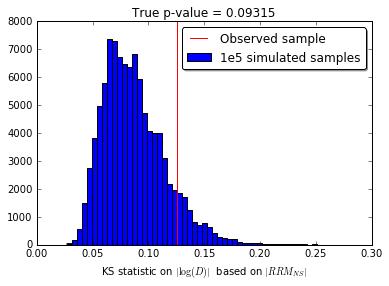

In [111]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $|\log(D)|$  based on $|RRM_{NS}|$')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label='Observed sample')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_abslogD_rrmNS.png')

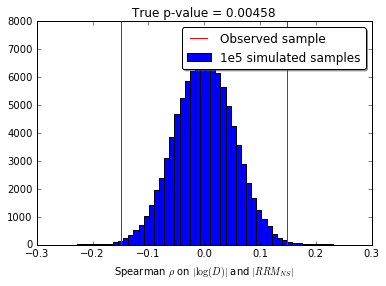

In [112]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $|\log(D)|$ and $|RRM_{NS}|$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label='Observed sample')
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_abslogD_rrmNS.png')

# $|\log(D)|$ & $|RRM_{T}|$  and KS distributions based on med($|RRM_{T}|$)


In [35]:
num=100000
sample=All[(All['Pi_SP_lim']==1) & (All['Pi_NV_lim']==1) & (All['RM_T'] != -1000) & (All['MedRM_T'] != -1000)& (All['P_NV_ct_frac'] <=0.01) & (All['I_NV']/All['I_NV_target'] <=1.01)]
D=sample['Depol'].to_numpy()
rm=sample['RM_T'].to_numpy()
medrm=sample['MedRM_T'].to_numpy()
rmt=rm-medrm
rmt=np.absolute(rmt)
logD2=np.absolute(np.log10(D))

logD2_random=randomize(logD2,num)
print np.shape(logD2_random)
rmt_random=randomize(rmt,num)

med=np.median(rmt)
half1=logD2[np.where(rmt< med)]
half2=logD2[np.where(rmt>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(rmt,logD2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(rmt)
    pii=rmt_random[j:j+len(rmt)]
    logD1=logD2_random[j:j+len(rmt)]
    medi=np.median(pii)
    half1=logD1[np.where(pii < medi )]
    half2=logD1[np.where(pii >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(pii,logD1)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in |log(D)| based on |RRM_NS| ', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in |log(D)| for the simulation is', frac2 
print len(howmany2[0])

(15300000,)
KS test  (0.10064935064935046, 0.83320886379052606)
Spearman rank correlation  0.117517361727
Spearman p-value 0.147979122202
Done!
The simulated p-vale for the KS statistic in |log(D)| based on |RRM_NS|  0.7301
73010
The simulated p-vale for the Spearman rho in |log(D)| for the simulation is 0.14888
14888


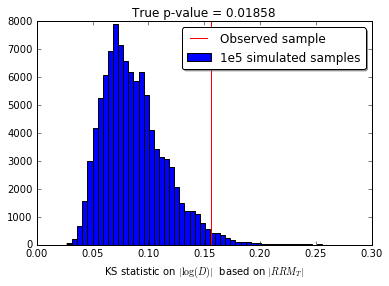

In [114]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $|\log(D)|$  based on $|RRM_T|$')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label='Observed sample')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_abslogD_rrmT.png')

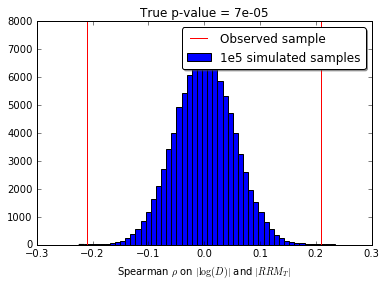

In [115]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $|\log(D)|$ and $|RRM_T|$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label='Observed sample')
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_abslogD_rrmT.png')

# $\pi_{SP}$ & $|RRM_{NS}|$  and KS distributions based on med($|RRM_{NS}|$)


In [116]:
num=100000
sample=All[(All['Pi_SP_lim']==1) & (All['RM_NS'] != -1000) & (All['MedRM_T'] != -1000)]
Pi=sample['Pi_SP'].to_numpy()
rm=sample['RM_NS'].to_numpy()
medrm=sample['MedRM_T'].to_numpy()
rmt=rm-medrm
rmt=np.absolute(rmt)
logD2=Pi

logD2_random=randomize(logD2,num)
print np.shape(logD2_random)
rmt_random=randomize(rmt,num)

med=np.median(rmt)
half1=logD2[np.where(rmt< med)]
half2=logD2[np.where(rmt>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(rmt,logD2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(rmt)
    pii=rmt_random[j:j+len(rmt)]
    logD1=logD2_random[j:j+len(rmt)]
    medi=np.median(pii)
    half1=logD1[np.where(pii < medi )]
    half2=logD1[np.where(pii >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(pii,logD1)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in Pi_SP based on |RRM_NS| ', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in Pi_SP for the simulation is', frac2 
print len(howmany2[0])

(35500000,)
KS test  (0.12572208468228246, 0.12092021957964257)
Spearman rank correlation  -0.123487854934
Spearman p-value 0.019944078744
Done!
The simulated p-vale for the KS statistic in Pi_SP based on |RRM_NS|  0.1008
10080
The simulated p-vale for the Spearman rho in Pi_SP for the simulation is 0.02099
2099


In [ ]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $\pi_{SP}$  based on $|RRM_{NS}|$')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label='Observed sample')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_PiSP_rrmNS.png')

In [ ]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $\pi_{SP}$ and $|RRM_{NS}|$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label='Observed sample')
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_PiSP_rrmNS.png')

# $\pi_{NV}$ & $|RRM_T|$  and KS distributions based on med($|RRM_T|$)


In [27]:
num=100000
sample=All[(All['Pi_NV_lim']==1) & (All['RM_T'] != -1000) & (All['MedRM_T'] != -1000)& (All['P_NV_ct_frac'] <=0.01) & (All['I_NV']/All['I_NV_target'] <=1.01)]
Pi=sample['Pi_NV'].to_numpy()
rm=sample['RM_T'].to_numpy()
medrm=sample['MedRM_T'].to_numpy()
rmt=rm-medrm
rmt=np.absolute(rmt)
logD2=Pi

logD2_random=randomize(logD2,num)
print np.shape(logD2_random)
rmt_random=randomize(rmt,num)

med=np.median(rmt)
half1=logD2[np.where(rmt< med)]
half2=logD2[np.where(rmt>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(rmt,logD2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(rmt)
    pii=rmt_random[j:j+len(rmt)]
    logD1=logD2_random[j:j+len(rmt)]
    medi=np.median(pii)
    half1=logD1[np.where(pii < medi )]
    half2=logD1[np.where(pii >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(pii,logD1)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in Pi_NV based on |RRM_T| ', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in Pi_NV for the simulation is', frac2 
print len(howmany2[0])

(15300000,)
KS test  (0.096377306903622631, 0.8694720252812902)
Spearman rank correlation  -0.0322092364816
Spearman p-value 0.692664608577
Done!
The simulated p-vale for the KS statistic in Pi_NV based on |RRM_T|  0.79063
79063
The simulated p-vale for the Spearman rho in Pi_NV for the simulation is 0.69231
69231


In [ ]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $\pi_{NV}$  based on $|RRM_T|$')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label='Observed sample')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_PiNV_rrmT.png')

In [ ]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $\pi_{NV}$ and $|RRM_T|$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label='Observed sample')
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_PiNV_rrmT.png')

# $\pi_{SP}$ & $|\Delta RM|$  and KS distributions based on med($\pi_{SP}$)


In [28]:
num=100000
sample=All[(All['Pi_NV_lim']==1) &(All['Pi_SP_lim']==1) & (All['DeltaRM'] != -1000)& (All['P_NV_ct_frac'] <=0.01) & (All['I_NV']/All['I_NV_target'] <=1.01)]
var1=sample['Pi_SP'].to_numpy()
var2=np.absolute(sample['DeltaRM'].to_numpy())

var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=np.median(var11)
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in |DeltaRM| based on Pi_SP ', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in |DeltaRM| and PI_SP for the simulation is', frac2 
print len(howmany2[0])

(15300000,)
KS test  (0.34466848940533212, 0.00022613311750765297)
Spearman rank correlation  -0.399677827205
Spearman p-value 3.0855049418e-07
Done!
The simulated p-vale for the KS statistic in |DeltaRM| based on Pi_SP  0.00017
17
The simulated p-vale for the Spearman rho in |DeltaRM| and PI_SP for the simulation is 0.0
0


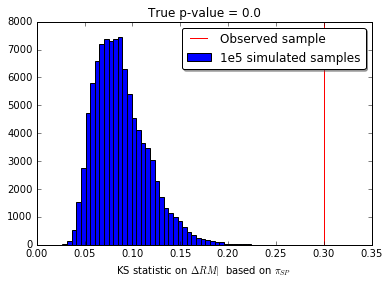

In [119]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $\Delta RM|$  based on $\pi_{SP}$')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label='Observed sample')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_absDeltaRM_PiSP.png')

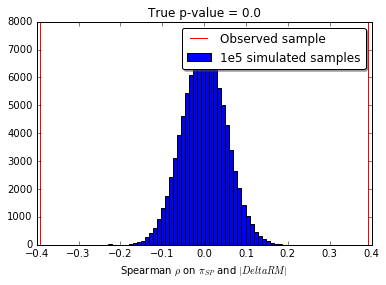

In [120]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $\pi_{SP}$ and $|Delta RM|$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label='Observed sample')
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_PiSP_absDeltaRM.png')

# $\pi_{NV}$ & $|\Delta RM|$  and KS distributions based on med($\pi_{NV}$)


In [34]:
num=100000
sample=All[(All['Pi_NV_lim']==1) &(All['Pi_SP_lim']==1) & (All['DeltaRM'] != -1000)& (All['P_NV_ct_frac'] <=0.01) & (All['I_NV']/All['I_NV_target'] <=1.01)]
var1=sample['Pi_NV'].to_numpy()
var2=np.absolute(sample['DeltaRM'].to_numpy())

var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=np.median(var11)
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in |DeltaRM| based on Pi_NV ', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in |DeltaRM| and PI_NV for the simulation is', frac2 
print len(howmany2[0])

(15300000,)
KS test  (0.35868079289131977, 0.00010640014754808775)
Spearman rank correlation  -0.477941207276
Spearman p-value 4.17036796464e-10
Done!
The simulated p-vale for the KS statistic in |DeltaRM| based on Pi_NV  3e-05
3
The simulated p-vale for the Spearman rho in |DeltaRM| and PI_NV for the simulation is 0.0
0


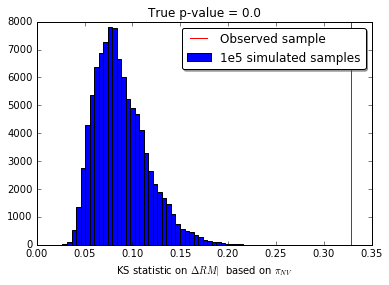

In [122]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $\Delta RM|$  based on $\pi_{NV}$')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label='Observed sample')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_absDeltaRM_PiNV.png')

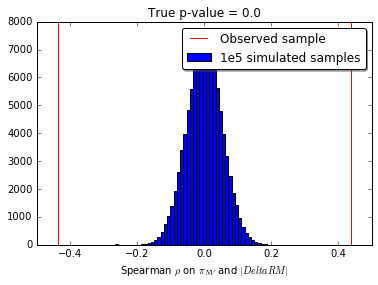

In [123]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $\pi_{NV}$ and $|Delta RM|$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label='Observed sample')
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_PiNV_absDeltaRM.png')

# $\pi_{NV}$ & $I_{NV}$  and KS distributions based on med($I_{NV}$)


In [125]:
num=100000
sample=All#[(All['Pi_NV_lim']==1)]
var1=sample['I_NV'].to_numpy()
var2=sample['Pi_NV'].to_numpy()

var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=np.median(var11)
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in Pi_NV based on I_NV ', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in I_NV and PI_NV for the simulation is', frac2 
print len(howmany2[0])

(53300000,)
KS test  (0.11437301117963401, 0.061236905453787252)
Spearman rank correlation  -0.13210212241
Spearman p-value 0.00224268227865
Done!
The simulated p-vale for the KS statistic in Pi_NV based on I_NV  0.0503
5030
The simulated p-vale for the Spearman rho in I_NV and PI_NV for the simulation is 0.00211
211


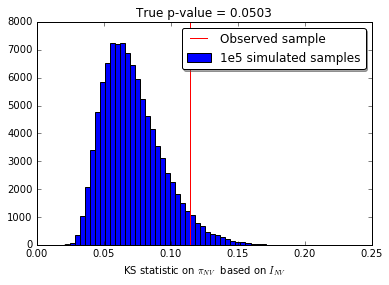

In [126]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $\pi_{NV}$  based on $I_{NV}$')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label='Observed sample')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_I_NV_PiNV.png')

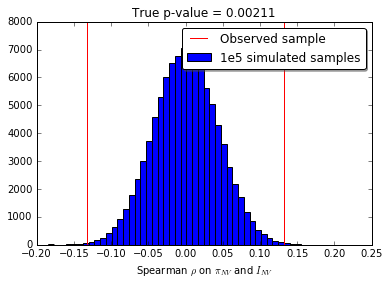

In [127]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $\pi_{NV}$ and $I_{NV}$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label='Observed sample')
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_PiNV_I_NV.png')

# $\pi_{NV}$ & $I_{NV}$  and KS distributions based on med($I_{NV}$) ONLY STEEP


In [129]:
num=100000
sample=All[(All['Alpha'] <-0.5)]
var1=sample['I_NV'].to_numpy()
var2=sample['Pi_NV'].to_numpy()

var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=np.median(var11)
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in Pi_NV based on I_NV, ONLY STEEP ', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale of ONLY STEEP for the Spearman rho in I_NV and PI_NV for the simulation is', frac2 
print len(howmany2[0])

(39600000,)
KS test  (0.12121212121212126, 0.10903287403762164)
Spearman rank correlation  -0.161294489551
Spearman p-value 0.00127884038028
Done!
The simulated p-vale for the KS statistic in Pi_NV based on I_NV, ONLY STEEP  0.09441
9441
The simulated p-vale of ONLY STEEP for the Spearman rho in I_NV and PI_NV for the simulation is 0.00126
126


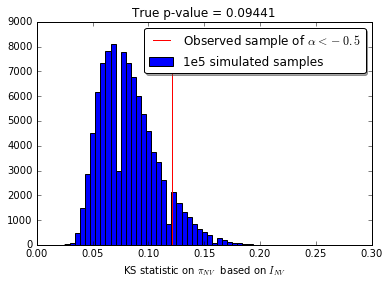

In [132]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $\pi_{NV}$  based on $I_{NV}$')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label=(r'Observed sample of $\alpha < -0.5$'))
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_I_NV_PiNV_steep.png')

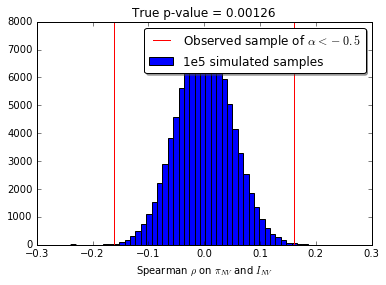

In [133]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $\pi_{NV}$ and $I_{NV}$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label=(r'Observed sample of $\alpha < -0.5$'))
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_PiNV_I_NV_steep.png')

# $\pi_{NV}$ & $I_{NV}$  and KS distributions based on med($I_{NV}$) ONLY flat


In [134]:
num=100000
sample=All[(All['Alpha'] >= -0.5)]
var1=sample['I_NV'].to_numpy()
var2=sample['Pi_NV'].to_numpy()

var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=np.median(var11)
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in Pi_NV based on I_NV, ONLY FLAT ', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale of ONLY FLAT for the Spearman rho in I_NV and PI_NV for the simulation is', frac2 
print len(howmany2[0])

(13700000,)
KS test  (0.076300085251491886, 0.9884653245681414)
Spearman rank correlation  -0.0364809946821
Spearman p-value 0.672129212679
Done!
The simulated p-vale for the KS statistic in Pi_NV based on I_NV, ONLY FLAT  0.96047
96047
The simulated p-vale of ONLY FLAT for the Spearman rho in I_NV and PI_NV for the simulation is 0.67447
67447


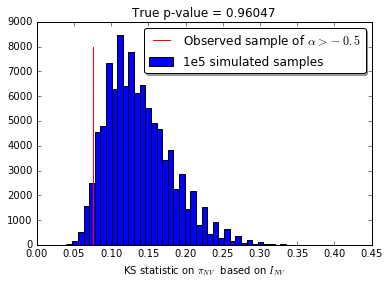

In [139]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $\pi_{NV}$  based on $I_{NV}$')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label=(r'Observed sample of $\alpha > -0.5$'))
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_I_NV_PiNV_flat.png')

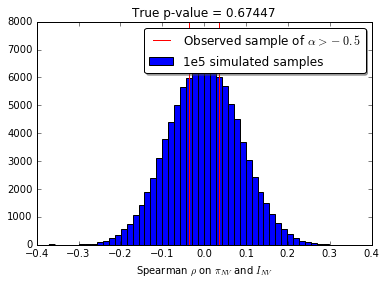

In [140]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $\pi_{NV}$ and $I_{NV}$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label=(r'Observed sample of $\alpha > -0.5$'))
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_PiNV_I_NV_flat.png')

# $|\log(D)|$ & $I_{NV}$  and KS distributions based on med($I_{NV}$) ONLY steep


In [142]:
num=100000
sample=All[(All['Alpha'] < -0.5) &(All['Pi_NV_lim'] == 1) &(All['Pi_SP_lim'] == 1)]
var1=sample['I_NV'].to_numpy()
var2=np.absolute(np.log10(sample['Depol'].to_numpy()))

var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=np.median(var11)
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in |log(D)| based on I_NV, ONLY STEEP ', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale of ONLY STEEP for the Spearman rho in I_NV and |log(D)| for the simulation is', frac2 
print len(howmany2[0])

(31500000,)
KS test  (0.10070144319922594, 0.40158273160745311)
Spearman rank correlation  0.0761356327583
Spearman p-value 0.177703894261
Done!
The simulated p-vale for the KS statistic in |log(D)| based on I_NV, ONLY STEEP  0.33052
33052
The simulated p-vale of ONLY STEEP for the Spearman rho in I_NV and |log(D)| for the simulation is 0.17702
17702


In [ ]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $|\log(D)|$  based on $I_{NV}$')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label=(r'Observed sample of $\alpha < -0.5$'))
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_I_NV_abslogD_steep.png')

In [ ]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $|\log(D)|$ and $I_{NV}$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label=(r'Observed sample of $\alpha < -0.5$'))
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_abslogD_I_NV_steep.png')

# $\pi_{SP}$ & $I_{SP}$  and KS distributions based on med($I_{SP}$)


In [43]:
num=100000
sample=All[(All['P_NV_ct_frac'] <=0.01) & (All['I_NV']/All['I_NV_target'] <=1.01)]
var1=sample['I_SP'].to_numpy()
var2=sample['Pi_SP'].to_numpy()

var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=np.median(var11)
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in Pi_SP based on I_SP ', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in I_SP and PI_SP for the simulation is', frac2 
print len(howmany2[0])

(21400000,)
KS test  (0.21495327102803738, 0.01425313473538657)
Spearman rank correlation  -0.175294495054
Spearman p-value 0.0101920939959
Done!
The simulated p-vale for the KS statistic in Pi_SP based on I_SP  0.01059
1059
The simulated p-vale for the Spearman rho in I_SP and PI_SP for the simulation is 0.00995
995


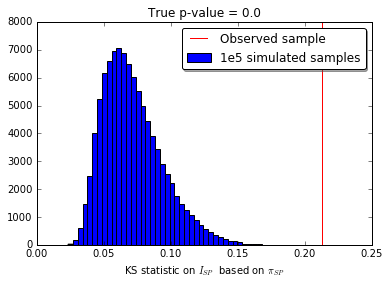

In [145]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $I_{SP}$  based on $\pi_{SP}$')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label=(r'Observed sample'))
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_pi_SP_I_SP.png')

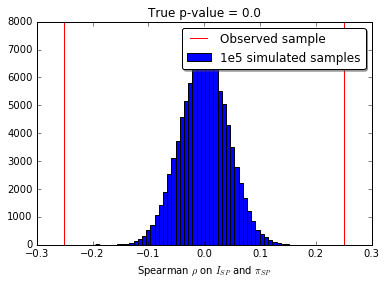

In [146]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $I_{SP}$ and $\pi_{SP}$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label=(r'Observed sample'))
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_pi_SP_I_SP.png')

# $\pi_{SP}$ & $I_{SP}$  and KS distributions based on med($I_{SP}$) for steep


In [31]:
num=100000
sample=All[(All['Alpha'] < -0.5)& (All['P_NV_ct_frac'] <=0.01) & (All['I_NV']/All['I_NV_target'] <=1.01)]
var1=sample['I_SP'].to_numpy()
var2=sample['Pi_SP'].to_numpy()
#id=np.where(sample['Pi_SP_lim']==-1)
#print len(id[0])
#var2[id[0]]=0.0
var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=np.median(var11)
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in Pi_SP based on I_SP for steep', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho of steep in I_SP and PI_SP for the simulation is', frac2 
print len(howmany2[0])

(17000000,)
KS test  (0.21176470588235302, 0.044217778926321803)
Spearman rank correlation  -0.15897240593
Spearman p-value 0.0383923887545
Done!
The simulated p-vale for the KS statistic in Pi_SP based on I_SP for steep 0.03697
3697
The simulated p-vale for the Spearman rho of steep in I_SP and PI_SP for the simulation is 0.03774
3774


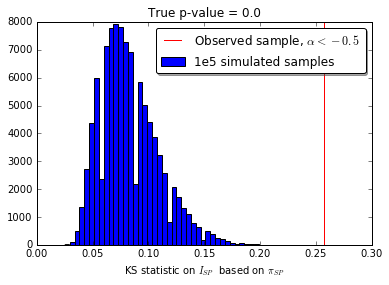

In [150]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $I_{SP}$  based on $\pi_{SP}$')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label=(r'Observed sample, $\alpha < -0.5$'))
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_pi_SP_I_SP_steep.png')

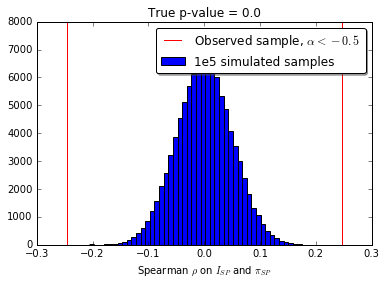

In [151]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $I_{SP}$ and $\pi_{SP}$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label=(r'Observed sample, $\alpha < -0.5$'))
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_pi_SP_I_SP_steep.png')

# $\pi_{SP}$ & $I_{SP}$  and KS distributions based on med($I_{SP}$) for flat


In [152]:
num=100000
sample=All[(All['Alpha'] >= -0.5)]
var1=sample['I_SP'].to_numpy()
var2=sample['Pi_SP'].to_numpy()

var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=np.median(var11)
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in Pi_SP based on I_SP for flat', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho of flat in I_SP and PI_SP for the simulation is', frac2 
print len(howmany2[0])

(13700000,)
KS test  (0.15942028985507248, 0.34886036624124872)
Spearman rank correlation  -0.0619267965792
Spearman p-value 0.472212663755
Done!
The simulated p-vale for the KS statistic in Pi_SP based on I_SP for steep 0.26439
26439
The simulated p-vale for the Spearman rho of steep in I_SP and PI_SP for the simulation is 0.47174
47174


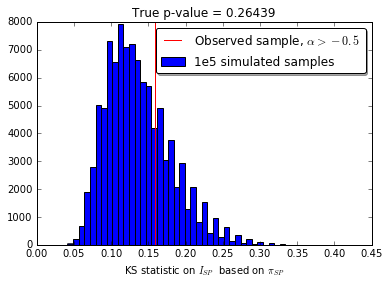

In [153]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $I_{SP}$  based on $\pi_{SP}$')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label=(r'Observed sample, $\alpha > -0.5$'))
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_pi_SP_I_SP_flat.png')

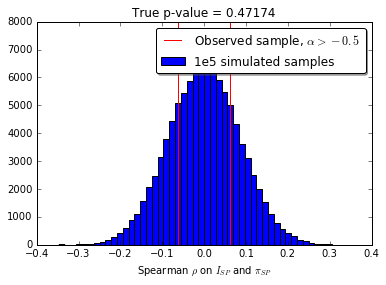

In [154]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $I_{SP}$ and $\pi_{SP}$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label=(r'Observed sample, $\alpha > -0.5$'))
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_pi_SP_I_SP_flat.png')

# $|\log(D)|$ & $I_{SP}$  and KS distributions based on med($I_{SP}$) for flat


In [156]:
num=100000
sample=All[(All['Alpha'] < -0.5) & (All['Pi_SP_lim']==1) & (All['Pi_NV_lim']==1) ]
var1=sample['I_SP'].to_numpy()
var2=np.absolute(np.log10(sample['Depol'].to_numpy()))

var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=np.median(var11)
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in |log(D)| based on I_SP ', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in I_SP and |log(D)| for the simulation is', frac2 
print len(howmany2[0])

(31500000,)
KS test  (0.094130452309925033, 0.48788535193070581)
Spearman rank correlation  0.014246962131
Spearman p-value 0.801144614015
Done!
The simulated p-vale for the KS statistic in |log(D)| based on I_SP  0.40459
40459
The simulated p-vale for the Spearman rho in I_SP and |log(D)| for the simulation is 0.80142
80142


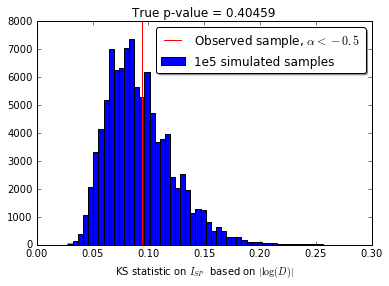

In [158]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $I_{SP}$  based on $|\log(D)|$')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label=(r'Observed sample, $\alpha < -0.5$'))
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_abslogD_I_SP_steep.png')

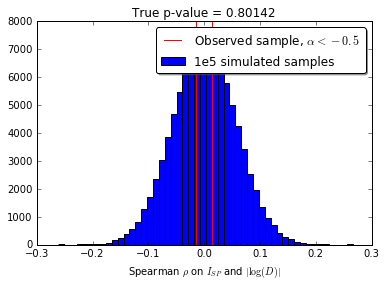

In [159]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $I_{SP}$ and $|\log(D)|$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label=(r'Observed sample, $\alpha < -0.5$'))
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_abslogD_I_SP_steep.png')

# D & $\alpha$  and KS distributions based on med($\alpha$) 


In [32]:
num=100000
sample=All[ (All['Pi_SP_lim']==1) & (All['Pi_NV_lim']==1) & (All['P_NV_ct_frac'] <=0.01) & (All['I_NV']/All['I_NV_target'] <=1.01)]
var1=sample['Alpha'].to_numpy()
var2=sample['Depol'].to_numpy()

var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=-0.5#np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=-0.5#np.median(var11)
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in D based on Alpha ', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in Alpha and D for the simulation is', frac2 
print len(howmany2[0])

(16900000,)
KS test  (0.34146897810219001, 0.0047182884271112857)
Spearman rank correlation  -0.240148398277
Spearman p-value 0.00166136844067
Done!
The simulated p-vale for the KS statistic in D based on Alpha  0.00357
357
The simulated p-vale for the Spearman rho in Alpha and D for the simulation is 0.00186
186


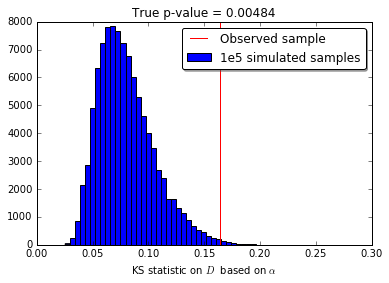

In [161]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $D$  based on $\alpha$')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label=(r'Observed sample'))
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_D_Alpha.png')

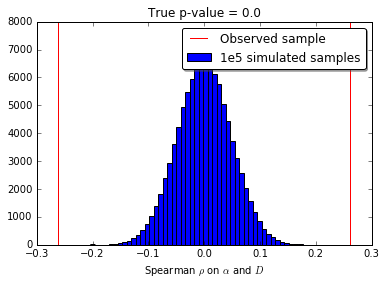

In [162]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $\alpha$ and $D$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label=(r'Observed sample'))
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_D_Alpha.png')

# A & $\pi_{SP}$  and KS distributions based on med(A) only steep


In [36]:
num=100000
sample=All[(All['Alpha'] <-0.5) & (All['P_NV_ct_frac'] <=0.01) & (All['I_NV']/All['I_NV_target'] <=1.01)]
var1=0.25*np.pi*sample['Mn'].to_numpy()*sample['Mj'].to_numpy()
var2=sample['Pi_SP'].to_numpy()

var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=np.median(var11)
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in Pi_SP based on A ', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in A and Pi_SP for the simulation is', frac2 
print len(howmany2[0])

(17000000,)
KS test  (0.28235294117647075, 0.0022805847282024645)
Spearman rank correlation  0.319382988423
Spearman p-value 2.18354146508e-05
Done!
The simulated p-vale for the KS statistic in Pi_SP based on A  0.00152
152
The simulated p-vale for the Spearman rho in A and Pi_SP for the simulation is 2e-05
2


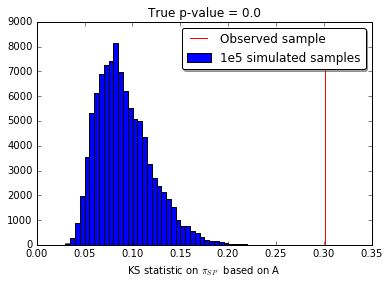

In [164]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $\pi_{SP}$  based on A ')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label=(r'Observed sample'))
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_A_Pi_SP.png')

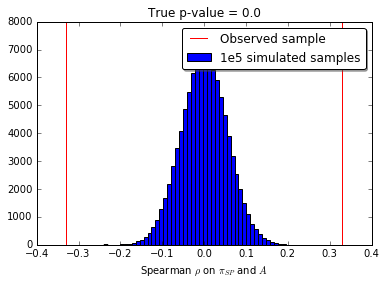

In [165]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $\pi_{SP}$ and $A$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label=(r'Observed sample'))
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_A_Pi_SP.png')

# A & $I_{SP}$  and KS distributions based on med(A) only steep


In [73]:
num=100000
sample=All[(All['Alpha'] <-0.5) ]
var1=0.25*np.pi*sample['Mn'].to_numpy()*sample['Mj'].to_numpy()
var2=sample['I_SP'].to_numpy()

var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=np.median(var11)
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in I_SP based on A ', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in A and I_SP for the simulation is', frac2 
print len(howmany2[0])

(39600000,)
KS test  (0.08716216216216216, 0.62115247983032418)
Spearman rank correlation  -0.0629281075137
Spearman p-value 0.211469946859
Done!
The simulated p-vale for the KS statistic in I_SP based on A  0.56811
56811
The simulated p-vale for the Spearman rho in A and I_SP for the simulation is 0.21163
21163


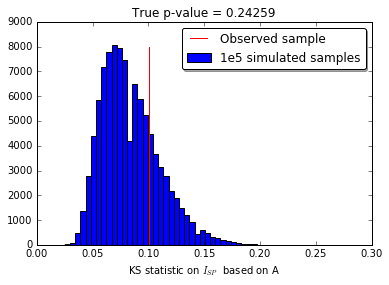

In [71]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $I_{SP}$  based on A ')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label=(r'Observed sample'))
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_A_I_SP.png')

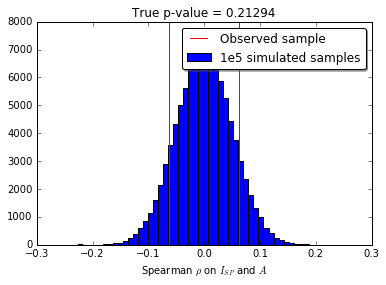

In [72]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $I_{SP}$ and $A$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label=(r'Observed sample'))
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_A_I_SP.png')

# $|\log(D)|$ & $L_{SP}$  and KS distributions based on $\log(D)\lessgtr 0.13$ only steep


In [69]:
num=100000
sample=All[(All['Alpha'] < -0.5) & (All['Pi_SP_lim'] ==1)& (All['Pi_NV_lim'] ==1) & (All['redshift'] != -1000)]
var1=np.absolute(np.log10(sample['Depol'].to_numpy()))
isp=sample['I_SP'].to_numpy()
z=sample['redshift'].to_numpy()
al=sample['Alpha'].to_numpy()
import cosmolopy.distance as cd
cosmo = {'omega_M_0':0.3, 'omega_lambda_0':0.7, 'omega_k_0':0.0, 'h':0.70}
ldis=cd.luminosity_distance(z,**cosmo)*1e6*3.08567758*1e16 # To convert Mpc to m
var2=((4.0*np.pi*ldis**2)*isp/1e29)/(1+z)**(1+al) # Calculating luminosity and converting mJy.m^2 to W/Hz


var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=0.13#np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=0.13#np.median(var11)
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in L_SP based on |logD| ', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in L_SP and |logD| for the simulation is', frac2 
print len(howmany2[0])

KeyboardInterrupt: 

In [ ]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $L_{SP}$  based on $|\log(D)|$ ')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label=(r'Observed sample'))
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_abslogD_L_SP.png')

In [ ]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $L_{SP}$ and $|\log(D)|$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label=(r'Observed sample'))
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_abslogD_L_SP.png')

# $\pi_{SP}$ & $L_{SP}$  and KS distributions based on $L_{SP}$ only steep


In [280]:
num=100000
sample=All[(All['Alpha'] < -0.5) & (All['Pi_SP_lim'] ==1)& (All['Pi_NV_lim'] ==1) & (All['redshift'] != -1000)]
var2=sample['Pi_SP'].to_numpy()
isp=sample['I_SP'].to_numpy()
z=sample['redshift'].to_numpy()
al=sample['Alpha'].to_numpy()
import cosmolopy.distance as cd
cosmo = {'omega_M_0':0.3, 'omega_lambda_0':0.7, 'omega_k_0':0.0, 'h':0.70}
ldis=cd.luminosity_distance(z,**cosmo)*1e6*3.08567758*1e16 # To convert Mpc to m
var1=((4.0*np.pi*ldis**2)*isp/1e29)/(1+z)**(1+al) # Calculating luminosity and converting mJy.m^2 to W/Hz


var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=1e27#np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=np.median(var11)
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in Pi_SP based on L_SP ', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in L_SP and Pi_SP for the simulation is', frac2 
print len(howmany2[0])

(14100000,)
KS test  (0.13949579831932774, 0.52715116504029691)
Spearman rank correlation  -0.134110643692
Spearman p-value 0.112859365483
Done!
The simulated p-vale for the KS statistic in Pi_SP based on L_SP  0.3967
39670
The simulated p-vale for the Spearman rho in L_SP and Pi_SP for the simulation is 0.1131
11310


In [ ]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $\pi_{SP}$  based on $L_{SP}$ ')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label=(r'Observed sample'))
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_PiSP_L_SP.png')

In [ ]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $L_{SP}$ and $\pi_{SP}$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label=(r'Observed sample'))
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_PiSP_L_SP.png')

# $\pi_{SP}$ & $L_{SP}$  and KS distributions based on $L_{SP}$ only flat


In [184]:
num=100000
sample=All[(All['Alpha'] >= -0.5) & (All['Pi_SP_lim'] ==1)& (All['Pi_NV_lim'] ==1) & (All['redshift'] != -1000)]
var2=sample['Pi_SP'].to_numpy()
isp=sample['I_SP'].to_numpy()
z=sample['redshift'].to_numpy()
al=sample['Alpha'].to_numpy()
import cosmolopy.distance as cd
cosmo = {'omega_M_0':0.3, 'omega_lambda_0':0.7, 'omega_k_0':0.0, 'h':0.70}
ldis=cd.luminosity_distance(z,**cosmo)*1e6*3.08567758*1e16 # To convert Mpc to m
var1=((4.0*np.pi*ldis**2)*isp/1e29)/(1+z)**(1+al) # Calculating luminosity and converting mJy.m^2 to W/Hz


var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=np.median(var11)
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in Pi_SP based on L_SP ', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in L_SP and Pi_SP for the simulation is', frac2 
print len(howmany2[0])

(8100000,)
KS test  (0.19329268292682927, 0.43582093624241774)
Spearman rank correlation  0.0703069862289
Spearman p-value 0.532824304637
Done!
The simulated p-vale for the KS statistic in Pi_SP based on L_SP  0.31591
31591
The simulated p-vale for the Spearman rho in L_SP and Pi_SP for the simulation is 0.53201
53201


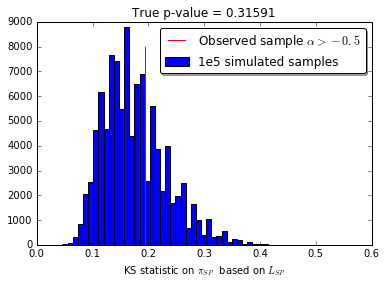

In [185]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $\pi_{SP}$  based on $L_{SP}$ ')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label=(r'Observed sample $\alpha > -0.5$'))
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_PiSP_L_SP_flat.png')

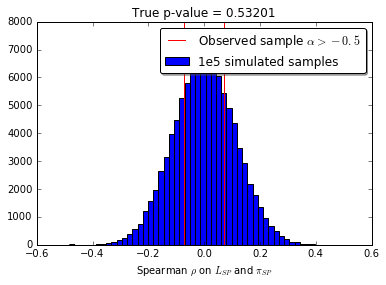

In [186]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $L_{SP}$ and $\pi_{SP}$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label=(r'Observed sample $\alpha > -0.5$'))
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_PiSP_L_SP_flat.png')

# $I_{SP}$ & $z$  and KS distributions based on $z$ only steep


In [187]:
num=100000
sample=All[(All['Alpha'] < -0.5) & (All['redshift'] != -1000)]
var2=sample['I_SP'].to_numpy()
var1=sample['redshift'].to_numpy()


var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=np.median(var11)
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in I_SP based on z ', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in I_SP and z for the simulation is', frac2 
print len(howmany2[0])

(16300000,)
KS test  (0.23863294188497455, 0.01929803434937398)
Spearman rank correlation  -0.115902472006
Spearman p-value 0.140663225103
Done!
The simulated p-vale for the KS statistic in I_SP based on z  0.0138
1380
The simulated p-vale for the Spearman rho in I_SP and z for the simulation is 0.14159
14159


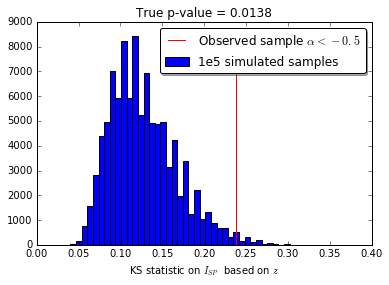

In [188]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $I_{SP}$  based on $z$ ')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label=(r'Observed sample $\alpha < -0.5$'))
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_I_SP_z_steep.png')

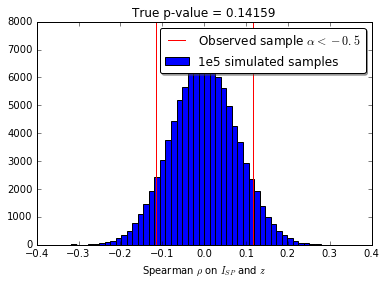

In [189]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $I_{SP}$ and $z$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label=(r'Observed sample $\alpha < -0.5$'))
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_I_SP_z_steep.png')

# $I_{SP}$ & $z$  and KS distributions based on $z$ only flat


In [190]:
num=100000
sample=All[(All['Alpha'] >= -0.5) & (All['redshift'] != -1000)]
var2=sample['I_SP'].to_numpy()
var1=sample['redshift'].to_numpy()


var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=np.median(var11)
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in I_SP based on z ', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in I_SP and z for the simulation is', frac2 
print len(howmany2[0])

(9800000,)
KS test  (0.22448979591836732, 0.16917069587707689)
Spearman rank correlation  -0.276464231409
Spearman p-value 0.00585725416166
Done!
The simulated p-vale for the KS statistic in I_SP based on z  0.13616
13616
The simulated p-vale for the Spearman rho in I_SP and z for the simulation is 0.00625
625


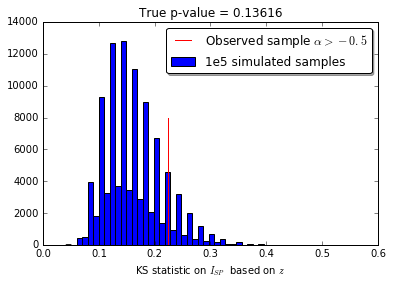

In [191]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $I_{SP}$  based on $z$ ')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label=(r'Observed sample $\alpha > -0.5$'))
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_I_SP_z_flat.png')

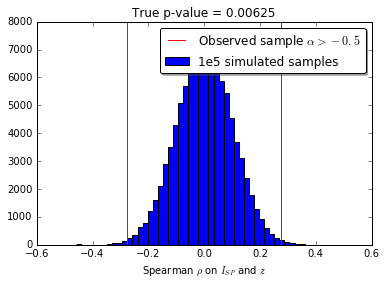

In [192]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $I_{SP}$ and $z$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label=(r'Observed sample $\alpha > -0.5$'))
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_I_SP_z_flat.png')

# $D$ & $z$  and KS distributions based on $z$ only steep


In [193]:
num=100000
sample=All[(All['Alpha'] < -0.5) & (All['redshift'] != -1000) & (All['Pi_NV_lim'] == 1)& (All['Pi_SP_lim'] == 1)]
var2=sample['Depol'].to_numpy()
var1=sample['redshift'].to_numpy()


var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=np.median(var11)
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in D based on z ', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in D and z for the simulation is', frac2 
print len(howmany2[0])

(14100000,)
KS test  (0.13405797101449279, 0.55108081077404247)
Spearman rank correlation  -0.027438636115
Spearman p-value 0.746713199563
Done!
The simulated p-vale for the KS statistic in D based on z  0.44207
44207
The simulated p-vale for the Spearman rho in D and z for the simulation is 0.74647
74647


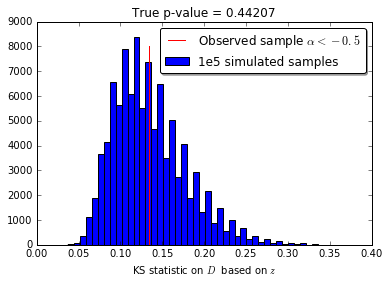

In [194]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $D$  based on $z$ ')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label=(r'Observed sample $\alpha < -0.5$'))
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_D_z_steep.png')

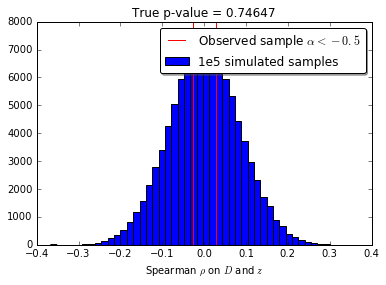

In [195]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $D$ and $z$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label=(r'Observed sample $\alpha < -0.5$'))
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_D_z_steep.png')

# $D$ & $z$  and KS distributions based on $z$ only flat


In [196]:
num=100000
sample=All[(All['Alpha'] >= -0.5) & (All['redshift'] != -1000) & (All['Pi_NV_lim'] == 1)& (All['Pi_SP_lim'] == 1)]
var2=sample['Depol'].to_numpy()
var1=sample['redshift'].to_numpy()


var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=np.median(var11)
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in D based on z ', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in D and z for the simulation is', frac2 
print len(howmany2[0])

(8100000,)
KS test  (0.23353658536585364, 0.21943784702425209)
Spearman rank correlation  0.102200991936
Spearman p-value 0.363934856918
Done!
The simulated p-vale for the KS statistic in D based on z  0.1537
15370
The simulated p-vale for the Spearman rho in D and z for the simulation is 0.36308
36308


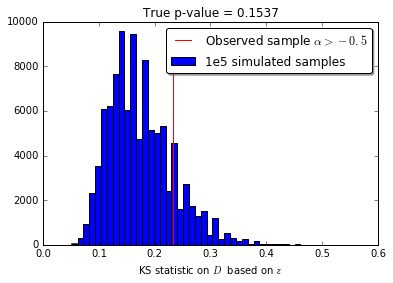

In [197]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $D$  based on $z$ ')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label=(r'Observed sample $\alpha > -0.5$'))
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_D_z_flat.png')

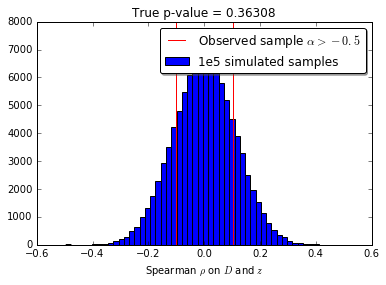

In [198]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $D$ and $z$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label=(r'Observed sample $\alpha > -0.5$'))
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_D_z_flat.png')

# $|RRM_T|$ & $z$  and KS distributions based on $z$


In [203]:
num=100000
sample=All[(All['redshift'] != -1000) & (All['RM_T'] != -1000) & (All['MedRM_T'] != -1000)]
var1=sample['redshift'].to_numpy()
var2=np.absolute(sample['RM_T'].to_numpy()-sample['MedRM_T'].to_numpy())


var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=np.median(var11)
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in |RRM_T| based on z ', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in |RRM_T| and z for the simulation is', frac2 
print len(howmany2[0])

(20600000,)
KS test  (0.17475728155339801, 0.086072646007274281)
Spearman rank correlation  0.114479694069
Spearman p-value 0.101320408595
Done!
The simulated p-vale for the KS statistic in |RRM_T| based on z  0.07399
7399
The simulated p-vale for the Spearman rho in |RRM_T| and z for the simulation is 0.10094
10094


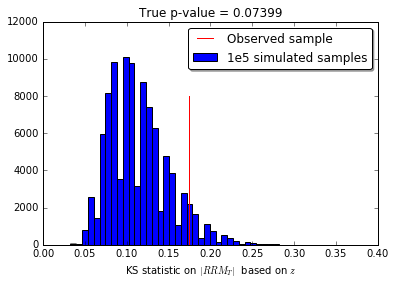

In [204]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $|RRM_T|$  based on $z$ ')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label=(r'Observed sample'))
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_absRRMT_z.png')

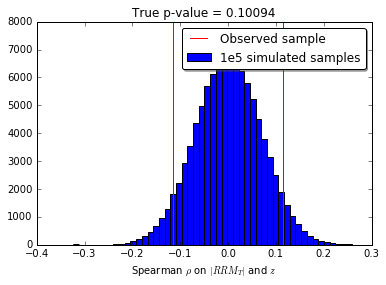

In [205]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $|RRM_T|$ and $z$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label=(r'Observed sample'))
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_absRRMT_z.png')

# $|RRM_T|$ & $z$  and KS distributions based on $z$ for only steep (Not in the original table)


In [206]:
num=100000
sample=All[(All['redshift'] != -1000) & (All['RM_T'] != -1000) & (All['MedRM_T'] != -1000)& (All['Alpha'] < -0.5)]
var1=sample['redshift'].to_numpy()
var2=np.absolute(sample['RM_T'].to_numpy()-sample['MedRM_T'].to_numpy())


var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=np.median(var11)
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in |RRM_T| based on z for steep ', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in |RRM_T| and z for the simulation is', frac2 
print len(howmany2[0])

(13200000,)
KS test  (0.18181818181818177, 0.22534817265305321)
Spearman rank correlation  0.159537388274
Spearman p-value 0.0676647130289
Done!
The simulated p-vale for the KS statistic in |RRM_T| based on z for steep  0.19396
19396
The simulated p-vale for the Spearman rho in |RRM_T| and z for the simulation is 0.06801
6801


# $|RRM_T|$ & $z$  and KS distributions based on $z$ for only steep and D > 1.5 (Not in the original table)


In [207]:
num=100000
sample=All[(All['redshift'] != -1000) & (All['RM_T'] != -1000) & (All['MedRM_T'] != -1000)& (All['Alpha'] < -0.5)& (All['Depol'] >= 1.5)]
var1=sample['redshift'].to_numpy()
var2=np.absolute(sample['RM_T'].to_numpy()-sample['MedRM_T'].to_numpy())


var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=np.median(var11)
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in |RRM_T| based on z for steep D>1.5 ', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in |RRM_T| and z for the simulation is', frac2 
print len(howmany2[0])

(3700000,)
KS test  (0.33625730994152048, 0.24684528431973107)
Spearman rank correlation  0.159080132764
Spearman p-value 0.346990860387
Done!
The simulated p-vale for the KS statistic in |RRM_T| based on z for steep D>1.5  0.16934
16934
The simulated p-vale for the Spearman rho in |RRM_T| and z for the simulation is 0.34341
34341


# $\pi_{SP}$ & $z$  and KS distributions based on $z$ for only steep 


In [208]:
num=100000
sample=All[(All['redshift'] != -1000)& (All['Alpha'] < -0.5)]
var1=sample['redshift'].to_numpy()
var2=sample['Pi_SP'].to_numpy()


var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=np.median(var11)
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in PiSP based on z for steep', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in PiSP and z for the simulation is', frac2 
print len(howmany2[0])

(16300000,)
KS test  (0.099819331526648569, 0.81155454486404544)
Spearman rank correlation  -0.0522272504346
Spearman p-value 0.507898545682
Done!
The simulated p-vale for the KS statistic in PiSP based on z for steep 0.7261
72610
The simulated p-vale for the Spearman rho in PiSP and z for the simulation is 0.50903
50903


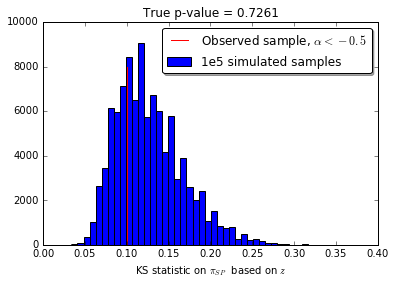

In [209]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $\pi_{SP}$  based on $z$ ')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label=(r'Observed sample, $\alpha < -0.5$'))
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_PiSP_z_steep.png')

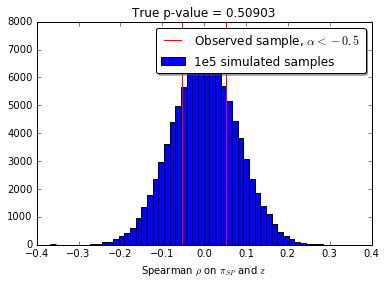

In [210]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $\pi_{SP}$ and $z$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label=(r'Observed sample, $\alpha < -0.5$'))
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_PiSP_z_steep.png')

# $\pi_{SP}$ & $z$  and KS distributions based on $z$ for only steep and D> 1.5 


In [214]:
num=100000
sample=All[(All['redshift'] != -1000)& (All['Alpha'] < -0.5)& (All['Depol'] >= 1.5)& (All['Pi_SP_lim'] == 1)]
var1=sample['redshift'].to_numpy()
var2=sample['Pi_SP'].to_numpy()


var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=np.median(var11)
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in PiSP based on z for steep and D>1.5', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in PiSP and z for the simulation is', frac2 
print len(howmany2[0])

(4800000,)
KS test  (0.16666666666666666, 0.89277833725010847)
Spearman rank correlation  0.121261466824
Spearman p-value 0.411637887463
Done!
The simulated p-vale for the KS statistic in PiSP based on z for steep and D>1.5 0.79369
79369
The simulated p-vale for the Spearman rho in PiSP and z for the simulation is 0.41259
41259


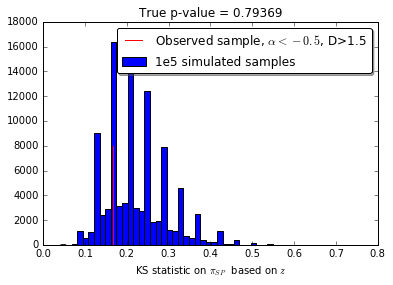

In [215]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $\pi_{SP}$  based on $z$ ')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label=(r'Observed sample, $\alpha < -0.5$, D>1.5'))
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_PiSP_z_steep_Dgt15.png')

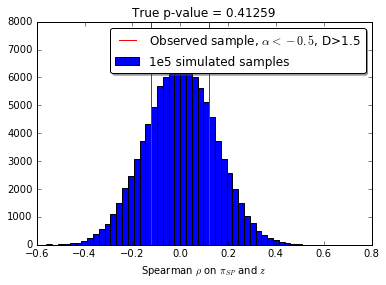

In [216]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $\pi_{SP}$ and $z$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label=(r'Observed sample, $\alpha < -0.5$, D>1.5'))
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_PiSP_z_steep_Dgt15.png')

# $\pi_{SP}$ & $z$  and KS distributions based on $z$ for only flat 


In [218]:
num=100000
sample=All[(All['redshift'] != -1000)& (All['Alpha'] >= -0.5)]
var1=sample['redshift'].to_numpy()
var2=sample['Pi_SP'].to_numpy()


var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=np.median(var11)
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in PiSP based on z for flat', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in PiSP and z for the simulation is', frac2 
print len(howmany2[0])

(9800000,)
KS test  (0.14285714285714285, 0.69937419913101573)
Spearman rank correlation  0.00536227218958
Spearman p-value 0.958207536541
Done!
The simulated p-vale for the KS statistic in PiSP based on z for flat 0.59269
59269
The simulated p-vale for the Spearman rho in PiSP and z for the simulation is 0.95841
95841


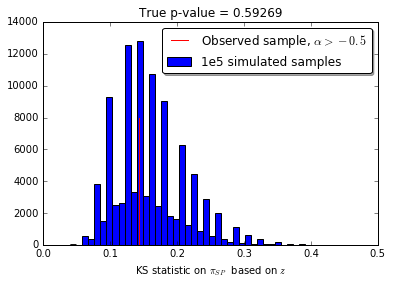

In [219]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $\pi_{SP}$  based on $z$ ')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label=(r'Observed sample, $\alpha > -0.5$'))
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_PiSP_z_flat.png')

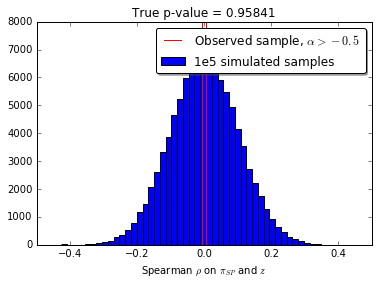

In [220]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $\pi_{SP}$ and $z$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label=(r'Observed sample, $\alpha > -0.5$'))
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_PiSP_z_flat.png')

# $|\Delta RM|$ & $z$  and KS distributions based on $z$


In [221]:
num=100000
sample=All[(All['redshift'] != -1000) & (All['DeltaRM'] != -1000)]
var1=sample['redshift'].to_numpy()
var2=np.absolute(sample['DeltaRM'].to_numpy())


var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=np.median(var11)
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in |DeltaRM| based on z ', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in |DeltaRM| and z for the simulation is', frac2 
print len(howmany2[0])

(21400000,)
KS test  (0.11214953271028037, 0.51149021538180317)
Spearman rank correlation  0.0412257270185
Spearman p-value 0.548637337452
Done!
The simulated p-vale for the KS statistic in |DeltaRM| based on z  0.47155
47155
The simulated p-vale for the Spearman rho in |DeltaRM| and z for the simulation is 0.55037
55037


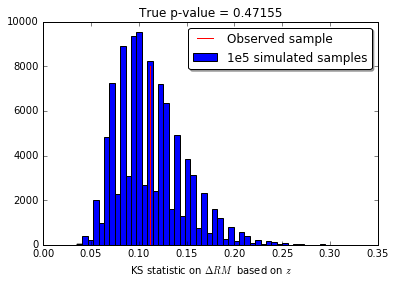

In [222]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $\Delta RM$  based on $z$ ')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label=(r'Observed sample'))
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_absDeltaRM_z.png')

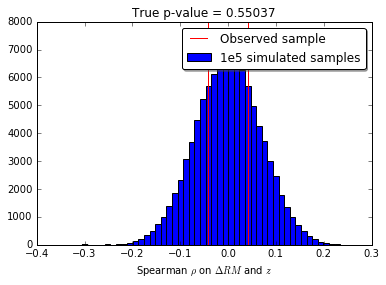

In [223]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $\Delta RM$ and $z$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label=(r'Observed sample'))
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_absDeltaRM_z.png')

# $|\Delta RM|$ & $z$  and KS distributions based on $z$ for steep and D>1.5 (Not in original table)


In [224]:
num=100000
sample=All[(All['redshift'] != -1000) & (All['DeltaRM'] != -1000)& (All['Alpha'] < -0.5)& (All['Depol'] > 1.5) & (All['Pi_SP_lim'] == 1)]
var1=sample['redshift'].to_numpy()
var2=np.absolute(sample['DeltaRM'].to_numpy())


var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=np.median(var11)
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in |DeltaRM| based on z for steep and D>1.5 ', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in |DeltaRM| and z for the simulation is', frac2 
print len(howmany2[0])

(4000000,)
KS test  (0.29999999999999999, 0.32910478909781504)
Spearman rank correlation  -0.0889305816135
Spearman p-value 0.585276029328
Done!
The simulated p-vale for the KS statistic in |DeltaRM| based on z for steep and D>1.5  0.26424
26424
The simulated p-vale for the Spearman rho in |DeltaRM| and z for the simulation is 0.5828
58280


# $\pi_{SP}$ & $\alpha$  and KS distributions based on $\alpha$ 


In [65]:
num=100000
sample=All[(All['Pi_SP_lim'] == 1)]
var1=sample['Alpha'].to_numpy()
var2=sample['Pi_SP'].to_numpy()


var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=-0.5 #np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=-0.5#np.median(var11)
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in Pi_SP based on Alpha', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in PiSP and Alpha for the simulation is', frac2 
print len(howmany2[0])

(42800000,)
KS test  (0.26317861143912646, 4.5566773989507567e-05)
Spearman rank correlation  -0.238103913957
Spearman p-value 6.2484279464e-07
Done!
The simulated p-vale for the KS statistic in Pi_SP based on Alpha 2e-05
2
The simulated p-vale for the Spearman rho in PiSP and Alpha for the simulation is 0.0
0


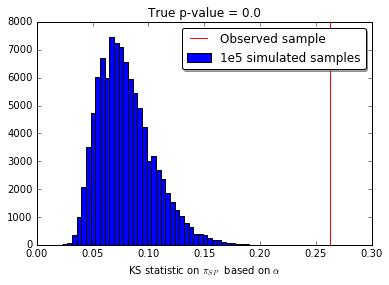

In [227]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $\pi_{SP}$  based on $\alpha$ ')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label=(r'Observed sample'))
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_PiSP_Alpha.png')

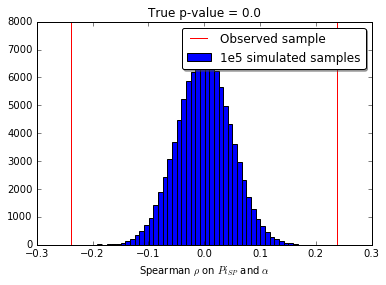

In [228]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $Pi_{SP}$ and $\alpha$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label=(r'Observed sample'))
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_PiSP_alpha.png')

# $W1-W2$ & $D$  and KS distributions based on $D \lessgtr 0.6$ 


In [9]:
from math import sqrt
num=100000
sample=All[(All['Pi_NV_lim'] == 1) &(All['Pi_SP_lim'] == 1) &(All['W1snr'] >= 5) & (All['W2snr'] >= 5)& (All['W3snr'] >= 2)& ((All['W2er']**2+All['W3er']**2).apply(lambda x: sqrt(x)) < 0.4)]
var1=sample['Depol'].to_numpy()
var2=sample['W1'].to_numpy()-sample['W2'].to_numpy()


var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=0.6
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=0.6
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in w1-w2 based on D', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in w1-w2 and D for the simulation is', frac2 
print len(howmany2[0])

(28700000,)
KS test  (0.26668216693792168, 0.028154348635942732)
Spearman rank correlation  -0.118126760864
Spearman p-value 0.0455579065888
Done!
The simulated p-vale for the KS statistic in w1-w2 based on D 0.02223
2223
The simulated p-vale for the Spearman rho in w1-w2 and D for the simulation is 0.04686
4686


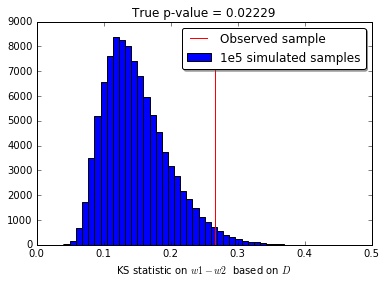

In [69]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $w1-w2$  based on $D$ ')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label=(r'Observed sample'))
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_w1-w2_D.png')

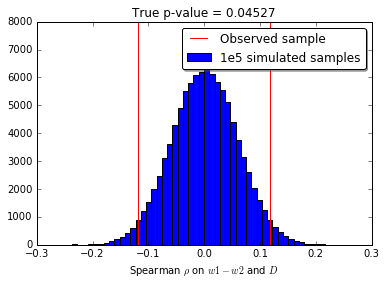

In [70]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $w1-w2$ and $D$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label=(r'Observed sample'))
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_w1-w2_D.png')

# $W1-W2$ & $D$  and KS distributions based on $0.6 < D < 1.7$ and $D>1.7$ 


In [71]:
from math import sqrt
num=100000
sample=All[(All['Pi_NV_lim'] == 1) &(All['Pi_SP_lim'] == 1)&(All['Depol'] > 0.6) &(All['W1snr'] >= 5) & (All['W2snr'] >= 5)& (All['W3snr'] >= 2)& ((All['W2er']**2+All['W3er']**2).apply(lambda x: sqrt(x)) < 0.4)]
var1=sample['Depol'].to_numpy()
var2=sample['W1'].to_numpy()-sample['W2'].to_numpy()


var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=1.7 #np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=1.7#np.median(var11)
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in w1-w2 based on D', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in w1-w2 and D for the simulation is', frac2 
print len(howmany2[0])

(25100000,)
KS test  (0.12029598308668073, 0.38655634520472582)
Spearman rank correlation  -0.0555861140069
Spearman p-value 0.380523519431
Done!
The simulated p-vale for the KS statistic in w1-w2 based on D 0.31115
31115
The simulated p-vale for the Spearman rho in w1-w2 and D for the simulation is 0.37983
37983


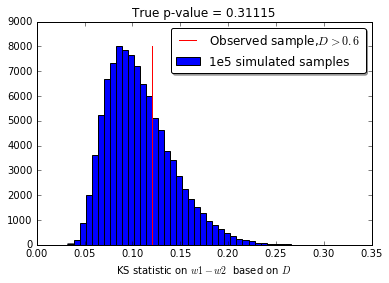

In [72]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $w1-w2$  based on $D$ ')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label=(r'Observed sample,$D>0.6$'))
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_w1-w2_Dgt0.6.png')

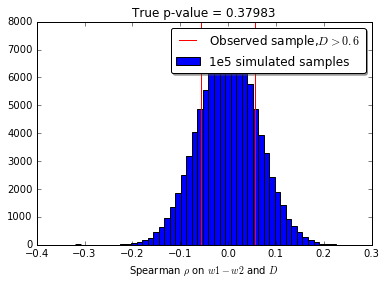

In [73]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $w1-w2$ and $D$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label=(r'Observed sample,$D>0.6$'))
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_w1-w2_Dgt0.6.png')

# $W2-W3$ & $D$  and KS distributions based on $0.6 < D < 1.7$ and $D>1.7$ 


In [74]:
from math import sqrt
num=100000
sample=All[(All['Pi_NV_lim'] == 1) &(All['Pi_SP_lim'] == 1)&(All['Depol'] > 0.6) &(All['W1snr'] >= 5) & (All['W2snr'] >= 5)& (All['W3snr'] >= 2)& ((All['W2er']**2+All['W3er']**2).apply(lambda x: sqrt(x)) < 0.4)]
var1=sample['Depol'].to_numpy()
var2=sample['W2'].to_numpy()-sample['W3'].to_numpy()


var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=1.7 #np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=1.7#np.median(var11)
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in w2-w3 based on D', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in w2-w3 and D for the simulation is', frac2 
print len(howmany2[0])

(25100000,)
KS test  (0.18992248062015557, 0.033868405247373917)
Spearman rank correlation  0.0559819620396
Spearman p-value 0.377135342423
Done!
The simulated p-vale for the KS statistic in w2-w3 based on D 0.0251
2510
The simulated p-vale for the Spearman rho in w2-w3 and D for the simulation is 0.37446
37446


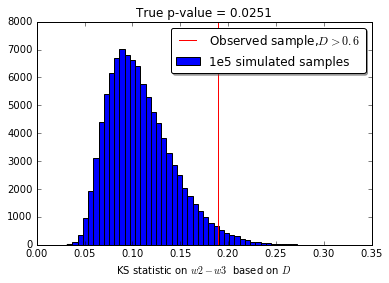

In [75]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $w2-w3$  based on $D$ ')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label=(r'Observed sample,$D>0.6$'))
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_w2-w3_Dgt0.6.png')

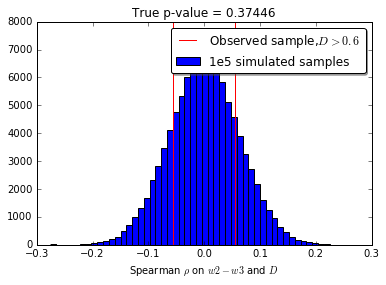

In [76]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $w2-w3$ and $D$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label=(r'Observed sample,$D>0.6$'))
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_w2-w3_Dgt0.6.png')

# $W1-W2$ & $D$  and KS distributions based on $w1-w2 \lessgtr 0.6$ and only steep


In [77]:
from math import sqrt
num=100000
sample=All[(All['Pi_NV_lim'] == 1) &(All['Pi_SP_lim'] == 1)&(All['Alpha'] < -0.5) &(All['W1snr'] >= 5) & (All['W2snr'] >= 5)& (All['W3snr'] >= 2)& ((All['W2er']**2+All['W3er']**2).apply(lambda x: sqrt(x)) < 0.4)]
var2=sample['Depol'].to_numpy()
var1=sample['W1'].to_numpy()-sample['W2'].to_numpy()


var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=0.6 #np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=0.6#np.median(var11)
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in D based on w1-w2 only steep', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in w1-w2 and D for the simulation is', frac2 
print len(howmany2[0])

(19300000,)
KS test  (0.15775862068965524, 0.3307268084513848)
Spearman rank correlation  -0.0581951268633
Spearman p-value 0.421453433308
Done!
The simulated p-vale for the KS statistic in D based on w1-w2 only steep 0.27119
27119
The simulated p-vale for the Spearman rho in w1-w2 and D for the simulation is 0.41922
41922


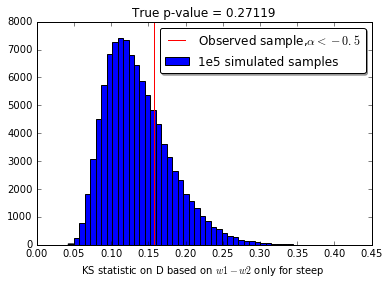

In [78]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on D based on $w1-w2$ only for steep  ')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label=(r'Observed sample,$\alpha <-0.5$'))
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_D_w1-w2_gt0.6.png')

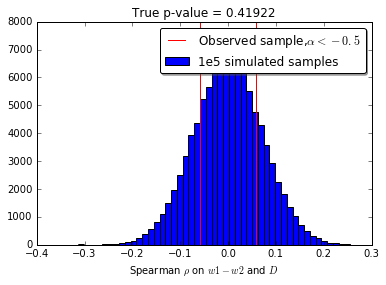

In [79]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $w1-w2$ and $D$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label=(r'Observed sample,$\alpha <-0.5$'))
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_D_w1-w2_gt0.6.png')

# $W1-W2$ & $\pi_{SP}$  and KS distributions based on $w1-w2 \lessgtr 0.6$ and only steep


In [80]:
from math import sqrt
num=100000
sample=All[(All['Pi_NV_lim'] == 1) &(All['Pi_SP_lim'] == 1)&(All['Alpha'] < -0.5) &(All['W1snr'] >= 5) & (All['W2snr'] >= 5)& (All['W3snr'] >= 2)& ((All['W2er']**2+All['W3er']**2).apply(lambda x: sqrt(x)) < 0.4)]
var2=sample['Pi_SP'].to_numpy()
var1=sample['W1'].to_numpy()-sample['W2'].to_numpy()


var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=0.6 #np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=0.6#np.median(var11)
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in PiSP based on w1-w2 only steep', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in w1-w2 and PiSP for the simulation is', frac2 
print len(howmany2[0])

(19300000,)
KS test  (0.11695402298850575, 0.70735320166837257)
Spearman rank correlation  -0.0665515871355
Spearman p-value 0.357793252481
Done!
The simulated p-vale for the KS statistic in PiSP based on w1-w2 only steep 0.62441
62441
The simulated p-vale for the Spearman rho in w1-w2 and PiSP for the simulation is 0.35581
35581


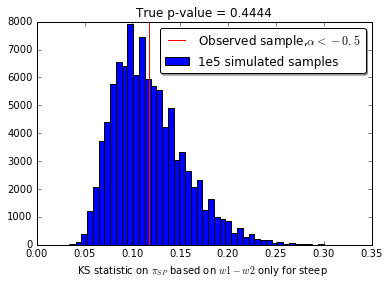

In [278]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $\pi_{SP}$ based on $w1-w2$ only for steep  ')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label=(r'Observed sample,$\alpha <-0.5$'))
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_PiSP_w1-w2_gt0.6.png')

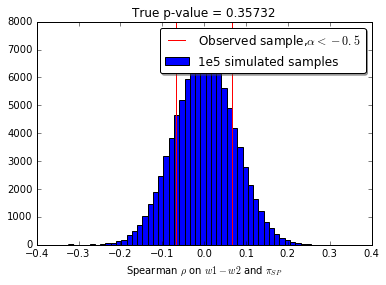

In [279]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $w1-w2$ and $\pi_{SP}$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label=(r'Observed sample,$\alpha <-0.5$'))
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_PiSP_w1-w2_gt0.6.png')

# $W1-W2$ & $\alpha$  and KS distributions based on $\alpha \lessgtr -0.5$ 


In [33]:
from math import sqrt
num=100000
sample=All[(All['W1snr'] >= 5) & (All['W2snr'] >= 5)& (All['W3snr'] >= 2)& ((All['W2er']**2+All['W3er']**2).apply(lambda x: sqrt(x)) < 0.4)& (All['P_NV_ct_frac'] <=0.01) & (All['I_NV']/All['I_NV_target'] <=1.01)]
var1=sample['Alpha'].to_numpy()
var2=sample['W1'].to_numpy()-sample['W2'].to_numpy()


var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=-0.5 #np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=np.median(var11)
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in Alpha based on w1-w2', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in w1-w2 and Alpha for the simulation is', frac2 
print len(howmany2[0])

(16000000,)
KS test  (0.32269197584124276, 0.0047901536951190076)
Spearman rank correlation  0.2532230568
Spearman p-value 0.00123464205305
Done!
The simulated p-vale for the KS statistic in Alpha based on w1-w2 0.00031
31
The simulated p-vale for the Spearman rho in w1-w2 and Alpha for the simulation is 0.00119
119


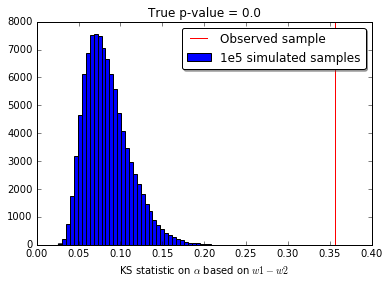

In [275]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $\alpha$ based on $w1-w2$')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label=(r'Observed sample'))
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_Alpha_w1-w2.png')

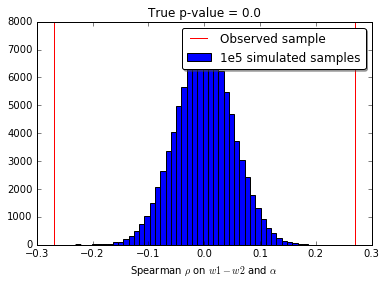

In [276]:
fig=plt.hist(rho,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac2))
plt.xlabel(r'Spearman $\rho$ on $w1-w2$ and $\alpha$')
plt.plot([rho_main,rho_main],[0,8000],color='red',label=(r'Observed sample'))
plt.plot([-1*rho_main,-1*rho_main],[0,8000],color='red')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueSpearman_Alpha_w1-w2.png')

In [11]:
polcat=sf.SFrame.read_csv('/Users/Mehdi/Dropbox/SPASS/main/Larry_contamination.txt',skip_initial_space=True,delimiter='  ')

PROGRESS: Finished parsing file /Users/Mehdi/Dropbox/SPASS/main/Larry_contamination.txt
PROGRESS: Parsing completed. Parsed 100 lines in 0.021049 secs.
------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[float,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
PROGRESS: Finished parsing file /Users/Mehdi/Dropbox/SPASS/main/Larry_contamination.txt
PROGRESS: Parsing completed. Parsed 729 lines in 0.009138 secs.


In [33]:
polcat

#I_target [mJy],I_cont [mJy],P_target [mJy],P_cont [mJy],S-PASS I,S-PASS P
1090.7,34.07,32.69,1.41,953.27,9.4
1104.4,12.49,64.528,-0.868,634.77,45.42
2660.1,283.76,86.392,66.348,1757.43,100.88
3430.9,15.37,139.828,0.252,2100.51,101.83
2402.0,49.06,21.221,6.249,1545.93,37.76
315.3,31.97,3.156,-0.286,598.41,0.75
347.4,3.08,5.287,-0.077,799.86,4.21
493.6,0.0,12.243,-0.003,896.93,2.48
520.9,0.0,1.166,-0.006,541.94,3.31
687.0,113.6,1.607,0.383,574.73,2.33


# D,  KS distributions based on polarization contamination $p_{cont}/p_{target} < 0.1$ and  $0.1<p_{cont}/p_{target}<0.25$ 


In [53]:
num=100000
from math import fabs
sample=polcat[(polcat['S-PASS I'] >= 420) & (polcat['P_target [mJy]']+polcat['P_cont [mJy]'] >= 0.87)& ((polcat['P_target [mJy]']+polcat['P_cont [mJy]'])/(polcat['#I_target [mJy]']+polcat['I_cont [mJy]']) >= 0.0012)& (polcat['S-PASS P'] >=5.1) & (polcat['S-PASS P']/polcat['S-PASS I'] >=0.0055) &((polcat['P_cont [mJy]']/polcat['P_target [mJy]']).apply(lambda x: fabs(x)) < 0.25)]
#pct/ptarget
var1=np.absolute(sample['P_cont [mJy]'].to_numpy()/sample['P_target [mJy]'].to_numpy())
#Depol
var2=(sample['S-PASS P'].to_numpy()/sample['S-PASS I'].to_numpy())/((sample['P_cont [mJy]'].to_numpy()+sample['P_target [mJy]'].to_numpy())/(sample['#I_target [mJy]'].to_numpy()+sample['I_cont [mJy]'].to_numpy()))


var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=0.1 #np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=0.1#np.median(var11)
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in D based on pct/ptarget<0.1 and 0.1<pct/ptarget<0.25', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in D and pct/ptarget for the simulation is', frac2 
print len(howmany2[0])

(47100000,)
KS test  (0.27523201856148777, 0.0078096258631822398)
Spearman rank correlation  0.217997875554
Spearman p-value 1.78730989408e-06
Done!
The simulated p-vale for the KS statistic in D based on pct/ptarget<0.1 and 0.1<pct/ptarget<0.25 0.00787
787
The simulated p-vale for the Spearman rho in D and pct/ptarget for the simulation is 0.0
0


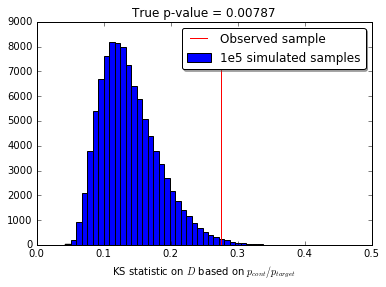

In [54]:
fig=plt.hist(ks1,bins=50,label='1e5 simulated samples')
plt.title('True p-value = '+str(frac))
plt.xlabel(r'KS statistic on $D$ based on $p_{cont}/p_{target}$')
plt.plot([ks_main[0],ks_main[0]],[0,8000],color='red',label=(r'Observed sample'))
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('TrueKS_D_cont.png')

# $\pi_{SP}$ & $\alpha$  and KS distributions based on $\alpha$ 


In [47]:
num=100000
sample=All[(All['P_NV_ct_frac'] <=0.01) & (All['I_NV']/All['I_NV_target'] <=1.01)]
var1=sample['Alpha'].to_numpy()
var2=sample['Pi_SP'].to_numpy()


var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

med=-0.5 #np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main=stats.mstats.ks_twosamp(half1,half2)
print 'KS test ', ks_main
rho_main, spvalue =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho_main
print 'Spearman p-value', spvalue

ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var11=var1_random[j:j+len(var1)]
    var22=var2_random[j:j+len(var1)]
    medi=-0.5#np.median(var11)
    half1=var22[np.where(var11 < medi )]
    half2=var22[np.where(var11 >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var11,var22)
    rho[i] =res2[0]
    sp_value[i]=res2[1]
print 'Done!'

howmany=np.where(ks1 >=ks_main[0])
frac=len(howmany[0])/float(num)
print 'The simulated p-vale for the KS statistic in Pi_SP based on Alpha', frac 
print len(howmany[0])

howmany2=np.where(np.absolute(rho) >=np.absolute(rho_main))
frac2=len(howmany2[0])/float(num)
print 'The simulated p-vale for the Spearman rho in PiSP and Alpha for the simulation is', frac2 
print len(howmany2[0])

(21400000,)
KS test  (0.22272727272727261, 0.062363968803489961)
Spearman rank correlation  -0.231543683534
Spearman p-value 0.00064048263476
Done!
The simulated p-vale for the KS statistic in Pi_SP based on Alpha 0.05013
5013
The simulated p-vale for the Spearman rho in PiSP and Alpha for the simulation is 0.00063
63


## what fraction of steep spectrum sources have D> 1 including the limits?


In [44]:
steep_depol=All[(All['Alpha'] < -0.5) & (All['Pi_SP_lim']==1) & (All['Depol'] > 1)]
steep=All[(All['Alpha'] < -0.5) & (All['Pi_SP_lim']==1)]

print len(steep_depol['Depol'])
print len(steep['Depol'])
print 'fraction ', 250.0/327.0

250
327
fraction  0.764525993884


## what fraction of steep spectrum sources have D< 1 including the limits?


In [45]:
steep_repol=All[(All['Alpha'] < -0.5) & (All['Pi_NV_lim']==1) & (All['Depol'] < 1)]
steep=All[(All['Alpha'] < -0.5) & (All['Pi_NV_lim']==1)]

print len(steep_repol['Depol'])
print len(steep['Depol'])
print 'fraction ', 95.0/373.0

95
373
fraction  0.254691689008


## what fraction of flat spectrum sources have D< 1 including the limits?



In [68]:
flat_repol=All[(All['Alpha'] >= -0.5) & (All['Pi_NV_lim']==1) & (All['Depol'] < 1)]
flat=All[(All['Alpha'] >= -0.5) & (All['Pi_NV_lim']==1)]

print len(flat_repol['Depol'])
print len(flat['Depol'])
print 'fraction ', 73.0/132.0

73
132
fraction  0.55303030303


## What fraction of sources have $\pi_{SP} > $3%

In [5]:
highp=All[All['Pi_SP'] > 0.03]
len(highp['Pi_SP'])

173

## Median $\pi_{SP}$ of steep and unresolved sources with detected polarizations

In [9]:
import math
print np.median(All[(All['Alpha'] < -0.5)& (All['Pi_NV_lim']==1) &(All['Pi_SP_lim']==1)&(0.25*math.pi*All['Mn']*All['Mj'] < 316.23)]['Pi_SP'].to_numpy())

0.0235
